In [2]:
cd ../

/Users/james/exSEEK_jupyter


In [3]:
import gc, argparse, sys, os, errno
from functools import reduce
%pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm_notebook as tqdm
import scipy
import sklearn
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings('ignore')
from bokeh.io import output_notebook, show
output_notebook()
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.neighbors import NearestNeighbors
from bokeh.palettes import Category20c
from ipywidgets import interact,interactive, FloatSlider,IntSlider, RadioButtons,Dropdown,Tab,Text

from collections import defaultdict
from sklearn.datasets import make_classification, make_regression, make_circles, make_moons, make_gaussian_quantiles
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.svm import SVC, LinearSVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold, train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, recall_score, precision_score, \
    roc_curve, precision_recall_curve, average_precision_score, matthews_corrcoef, confusion_matrix
from statsmodels.robust.scale import mad
from scipy.stats import pearsonr

random_state = np.random.RandomState(1289237)  #我固定numpy的随机种子，以使结果可重现

Populating the interactive namespace from numpy and matplotlib


Loading BokehJS ...

# load plotting functions
embed pdf; std_plot; display dataframe

In [4]:
#setup figure template
figure_template_path = 'bin'
if figure_template_path not in sys.path:
    sys.path.append(figure_template_path)
from importlib import reload
import figure_template
#force reload of the module
reload(figure_template)
from figure_template import display_dataframe, embed_pdf_figure, embed_pdf_pages,std_plot,legendhandle

# General intro of all most important concepts in machine learning

## Introduction

### 机器学习的定义与分类

机器学习研究如何从数据中学习其隐藏的模式并预测未知数据的特征。

根据预测变量是否已知，机器学习通常分为两类：**监督学习**和**无监督学习**。
 
- 监督学习

模型通过特征和类别标签作为构建模型的输入。如果目标变量（要预测的变量）是类别信息（例如正/负），该问题称为分类问题。如果目标变量是连续的（例如身高）则为回归问题。

- 无监督学习

目标变量是未指定的。模型的目的是确定内部数据的结构（cluster）。在模型拟合之后，我们可以将新来的样本分给cluster或生成与原始数据具有相似分布的样本。无监督学习也可以用于监督学习之前的数据预处理步骤。

一个完整的、有效的机器学习工程项目却包括很多步骤，可以包括**数据导入，数据可视化理解，前处理，特征选择，模型训练，参数调整，模型预测，模型评估，后处理**等多个步骤，一个在真实世界中有效的模型可能需要工作者对数据的深入理解，以选择各个步骤合适的方法。



## 一个最简单的数据集


### 分类问题数据集
我们可以产生一个标签为离散值的用于分类问题的数据集

[sklearn.datasets.make_classification](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html#sklearn.datasets.make_classification) 可以从一个混合高斯分布中产生样本，并且可以控制样本数量，类别数量和特征数量。

我们会产生一个数据集，共有1000个样本，两种类别，四种特征。

In [6]:
X, y = make_classification(n_samples=1000, n_classes=2, n_features=4,
                           n_informative=2, n_redundant=0, n_clusters_per_class=1,
                           class_sep=0.9, random_state=random_state)
X.shape, y.shape #查看特征和标签的shape

((1000, 4), (1000,))

### 类别和特征矩阵

In [7]:
X,y

(array([[ 1.20208996, -0.08910427, -1.11576995,  0.66218976],
        [-0.93205879, -1.59357499, -2.91424455,  0.59468278],
        [ 0.05881623,  0.85883561,  0.82327248, -0.26637041],
        ...,
        [ 0.58392299, -0.63511179, -2.53574963,  0.06356095],
        [-2.09024926, -0.36378703,  0.53724784,  0.42828778],
        [ 0.34611522, -0.25102786, -0.35406809,  1.49935637]]),
 array([0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
        0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
        0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
        1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
        1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
        1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
        1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
        1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
        1, 0, 0, 0, 0

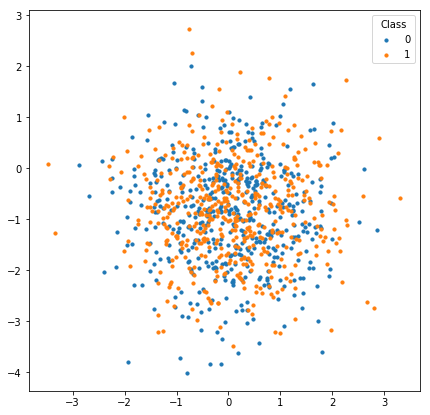

In [8]:
fig, ax = plt.subplots(figsize=(7, 7))
for label in np.unique(y):
    ax.scatter(X[y == label, 0], X[y == label, 1], s=10, label=str(label))
ax.legend(title='Class')
#embed_pdf_figure()

### PCA 可视化
上面只用到了前两维的特征，这显然不够全面，回忆[PCA的内容](https://lulab.gitbook.io/training/part-iii.-case-studies/case-study-2.exseek/2.2.normalization)

In [9]:
filled_markers = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')
fontlegend = {'family':'Arial',
                  'weight' : 'normal', 
                  'size' : 6.5*1}
def PCA_plot_sns(ax,data,sampleclass,method = 'Origin'):
    #X = log_transfrom(data).T
    X = StandardScaler().fit_transform(data.T)
    if method=='Origin':
        X_pca=X
    if method == 'PCA':
        transform = PCA()
        X_pca = transform.fit_transform(X)
    elif method == 'tSNE':
        transform = TSNE()
        X_pca = transform.fit_transform(X)
   
    plot_table = pd.DataFrame(X_pca[:,:2])
    plot_table.index = data.columns
    plot_table = pd.concat((plot_table,sampleclass.loc[plot_table.index]),axis=1)
    plot_table.columns = ['dimension_1','dimension_2','class']
    classnum = np.unique(plot_table.iloc[:,2]).shape[0]

    sns.scatterplot(ax=ax,data=plot_table,x="dimension_1", y="dimension_2",markers=filled_markers,alpha=0.5,
                    palette=legendhandle(np.unique(plot_table['class'])), hue="class",style="class",s=30,linewidth=0.01)
    
    std_plot(ax,'Dimension 1','Dimension 2',
             title=method, legendtitle='class',legendsort=False
             ,xbins=6,ybins=6
            )
    legend = ax.legend(prop=fontlegend,
     bbox_to_anchor=(1.2,0.9),framealpha=0,labelspacing=0.24)
    ax.legend_.get_frame()._linewidth=0
    fig.tight_layout()
    

整理成需要的输入格式，seaborn接受dataframe

In [10]:
display(pd.DataFrame(X).head()),display(pd.DataFrame(y).head())

0         1         2         3
0  1.202090 -0.089104 -1.115770  0.662190
1 -0.932059 -1.593575 -2.914245  0.594683
2  0.058816  0.858836  0.823272 -0.266370
3  0.535960 -0.257348 -1.407859 -0.584527
4 -1.566092  0.555146 -1.350528  1.442555

0
0  0
1  0
2  1
3  0
4  0

(None, None)

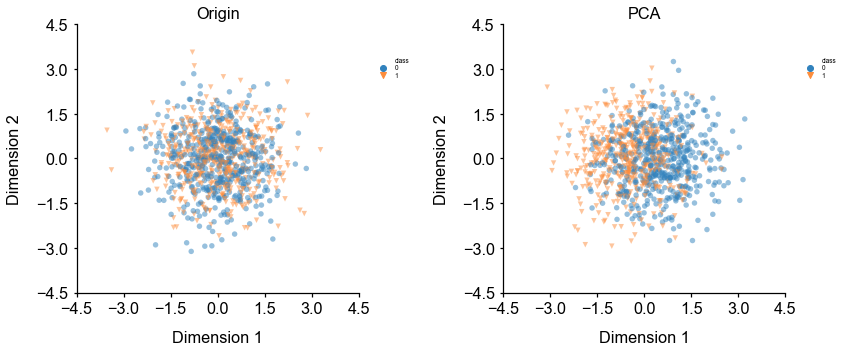

In [11]:
input_table = pd.DataFrame(X)
class_label = pd.DataFrame(y)
class_label.columns = ['label']

fig, ax = plt.subplots(1,2,figsize=(12,5))
PCA_plot_sns(ax[0], input_table.T,class_label,'Origin')
PCA_plot_sns(ax[1], input_table.T,class_label,'PCA')
#embed_pdf_figure()

这说明，简单的线性分类可能难以奏效

## Data scaling

对于大多数机器学习算法，建议将feature scale到一个比较小的范围，以减少极端值的影响。

feature的规模过大或者过小都会增加数值不稳定的风险并且还使损失函数更加难以优化。
- 基于线性模型权重的特征选择方法会假定输入的feature在同样的规模上。
- 基于梯度下降算法的模型（比如神经网络）的表现和收敛速度会被没有合理scale的数据显著影响。
- 决策树和随机森林类算法对数据规模不太敏感，因为它们使用rule-based标准。

常见的数据缩放方法包括：
>
- standard/z-score scaling

Standard/z-score scaling first shift features to their centers(mean) and then divide by their standard deviation.
This method is suitable for most continous features of approximately Gaussian distribution.

$$ \text{zscore}(x_{ij}^{'}) = \frac{x_{ij} - \mu _{ij}}{\sigma _i} $$

- min-max scaling

Min-max scaling method scales data into range \[0, 1\].
This method is suitable for data concentrated within a range and preserves zero values for sparse data.
Min-max scaling is also sensitive to outliers in the data. Try removing outliers or clip data into
a range before scaling.

$$ \text{min_max}(x_{ij}^{'}) = \frac{x_{ij} - \text{min}_k \mathbf{x}_{ik}}
{\text{max}_k x_{ik} - \text{min}_k x_{ik}} $$


- abs-max scaling.

Max-abs scaling method is similar to min-max scaling, but scales data into range \[-1, 1\].
It does not shift/center the data and thus preserves signs (positive/negative) of features.
Like min-max, max-abs is sensitive to outliers.

$$ \text{max_abs}(x_{ij}^{'}) = \frac{x_{ij}}{\text{max}_k \vert x_{ik} \vert} $$

- robust scaling

Robust scaling method use robust statistics (median, interquartile range) instead of mean and standard deviation.
Median and IQR are less sensitive to outliers.
For features with large numbers of outliers or largely deviates from normal distribution, 
robust scaling is recommended.

$$ \text{robust_scale}(x_{ij}^{'}) = \frac{x_{ij} - \text{median}_k x_{ik}}
{Q_{0.75}(\mathbf{x}_i) - Q_{0.25}(\mathbf{x}_i)} $$

值得注意的是，exSEEK采用的就是最后一种标准化的方法。另外注意区分机器学习中的常规操作：对特征的标准化和RNA-seq分析中常用的样本库大小归一化的区别

### 使用standard/z-score scaling 对数据做scaling
使用方法如下：

In [12]:
X = StandardScaler().fit_transform(X)

Text(0.5, 1.0, 'scaled data distribution by standard scaling')

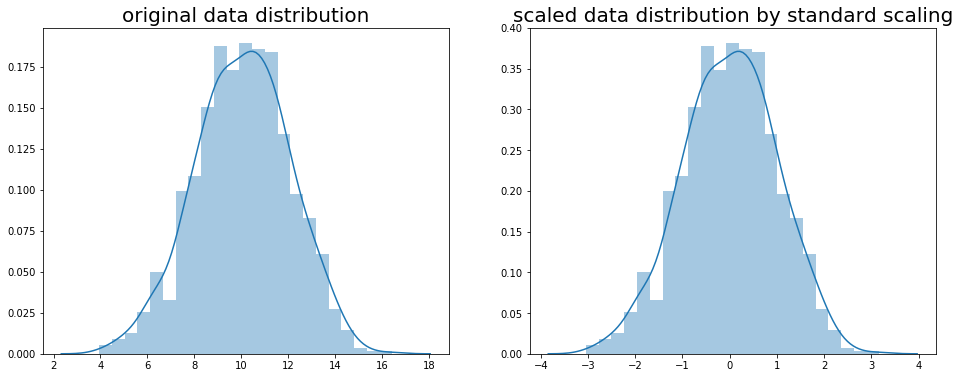

In [13]:
#产生模拟数据，1000个数据点，均值为10，标准差为2
x = random_state.normal(10, 2, size=1000)
fig, ax = plt.subplots(1,2,figsize=(16, 6))
sns.distplot(np.ravel(x), ax=ax[0])
sns.distplot(np.ravel(StandardScaler().fit_transform(x.reshape((-1, 1)))), ax=ax[1])
ax[0].set_title('original data distribution',fontsize=20)
ax[1].set_title('scaled data distribution by standard scaling',fontsize=20)

Text(0.5, 1.0, 'scaled data distribution by robust scaling')

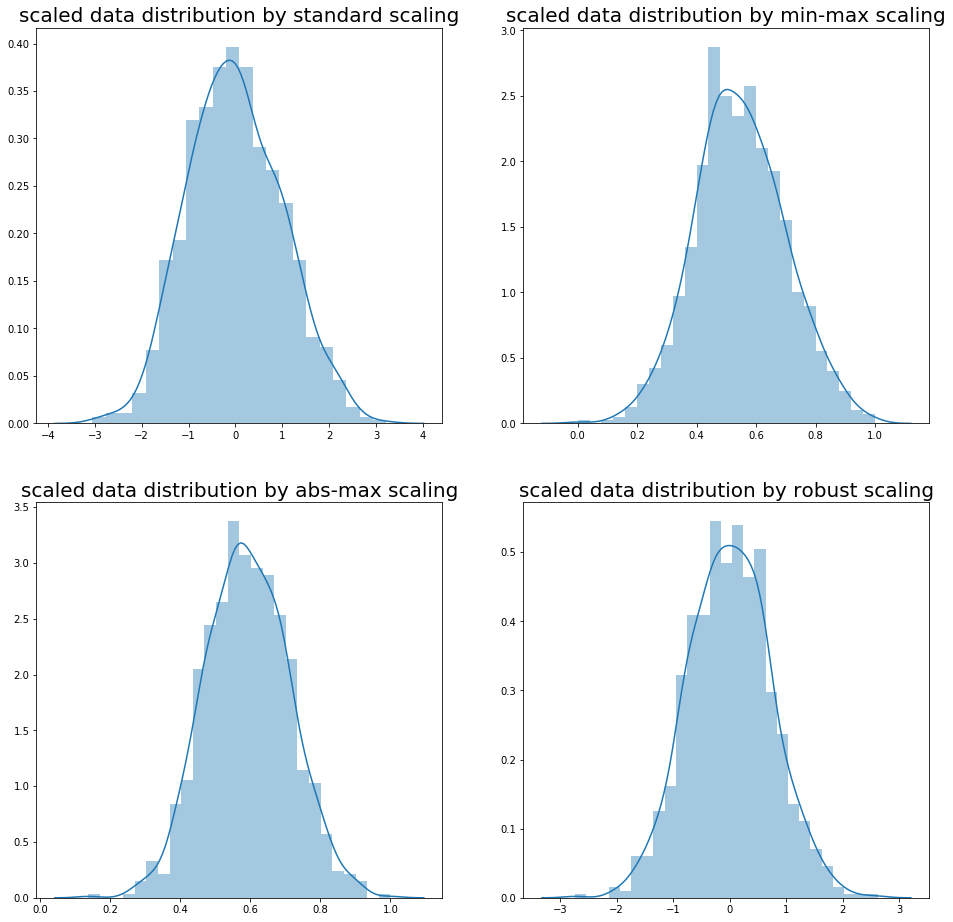

In [14]:
#产生模拟数据，1000个数据点，均值为10，标准差为2

fig, ax = plt.subplots(2,2,figsize=(16, 16))
x = random_state.normal(10, 2, size=1000)
sns.distplot(np.ravel(StandardScaler().fit_transform(x.reshape((-1, 1)))), ax=ax[0,0])
x = random_state.normal(10, 2, size=1000)
sns.distplot(np.ravel(MinMaxScaler().fit_transform(x.reshape((-1, 1)))), ax=ax[0,1])
x = random_state.normal(10, 2, size=1000)
sns.distplot(np.ravel(MaxAbsScaler().fit_transform(x.reshape((-1, 1)))), ax=ax[1,0])
x = random_state.normal(10, 2, size=1000)
sns.distplot(np.ravel(RobustScaler().fit_transform(x.reshape((-1, 1)))), ax=ax[1,1])
ax[0,0].set_title('scaled data distribution by standard scaling',fontsize=20)
ax[0,1].set_title('scaled data distribution by min-max scaling',fontsize=20)
ax[1,0].set_title('scaled data distribution by abs-max scaling',fontsize=20)
ax[1,1].set_title('scaled data distribution by robust scaling',fontsize=20)

## 划分数据得到训练集和测试集（training set & test set）

到这里，我们已经对数据进行了一些分析，并且做了一些基本的预处理，接下来我们需要对数据进行划分，得到训练集和测试集，通过训练集中的数据训练模型，再通过测试集的数据评估模型的表现。

因为模型总是会在某种程度上过拟合训练数据，因此在训练数据上评估模型是有偏的，模型在训练集上的表现总会比测试集上好一些。

因为模型总是可以学到数据中隐藏的模式和分布，如果样本间彼此的差异比较大，过拟合问题就会得到一定程度的减轻。而如果数据的量比较大，模型在训练集和测试集上的表现差异就会减小。


使用[train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
方法来随机的将80%的样本设置为训练样本， 将其余20%设置为测试样本。


另一个常见的概念是验证集（validation set），通过将训练集再随机划分为训练集和验证集，进行多折交叉验证（[cross validation](https://www.zhihu.com/question/39259296)），可以帮助我们评估不同的模型，调整模型的超参数等。

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
print('number of training samples: {}, test samples: {}'.format(X_train.shape[0], X_test.shape[0]))

number of training samples: 800, test samples: 200


## 模型训练

在模型训练的过程中，模型内部的参数会调整以最小化[损失函数](http://www.csuldw.com/2016/03/26/2016-03-26-loss-function/)。

### 逻辑斯谛回归

逻辑斯谛回归是一个简单但是非常有效的模型，与它的名字不同，逻辑斯谛回归用于解决分类问题，在二分类问题中被广泛使用。对于二分类问题，我们需要对每一个样本预测它属于哪一类（0或者1）。

逻辑斯谛回归是一个线性分类模型，它会对输入的feature进行线性组合，然后将线性组合组合得到的值通过一个非线性的sigmoid函数映射为一个概率值(范围为0~1)。

模型训练过程中，模型内部的参数（线性模型的权重）会调整使得模型的损失函数（真实label和预测label的交叉熵）最小。

$$ p(y_i | \mathbf{x}_i) = \frac{1}{1 + \text{exp} \left( \sum_{j=1}^M x_{ij} w_{j} + b \right)} $$

#### 调用逻辑回归模型并且训练模型
使用sklearn封装好的模型进行模型的训练非常简单，以逻辑斯谛回归模型为例，只需要两行即可完成模型的训练。

我们使用默认参数进行训练，核心的内容非常简单

In [18]:
model = LogisticRegression()
model.fit(X_train, y_train)
model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

#### 模型内部的参数
对于逻辑斯谛回归模型来说，其内部的参数是线性模型的权重项和偏置项$w_{j} , b$

In [20]:
model.coef_,model.intercept_

(array([[ 0.07096128,  0.60321676,  3.30010344, -0.12203269]]),
 array([-0.3411881]))

##### 四个特征的各自的权重（贡献）

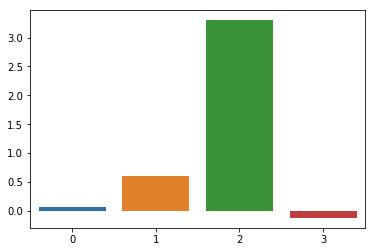

In [25]:
sns.barplot(data=pd.DataFrame(model.coef_))

我们来验证一下这个“聪明”的模型找到的**最大权重**的特征是不是真的是**最有用的**

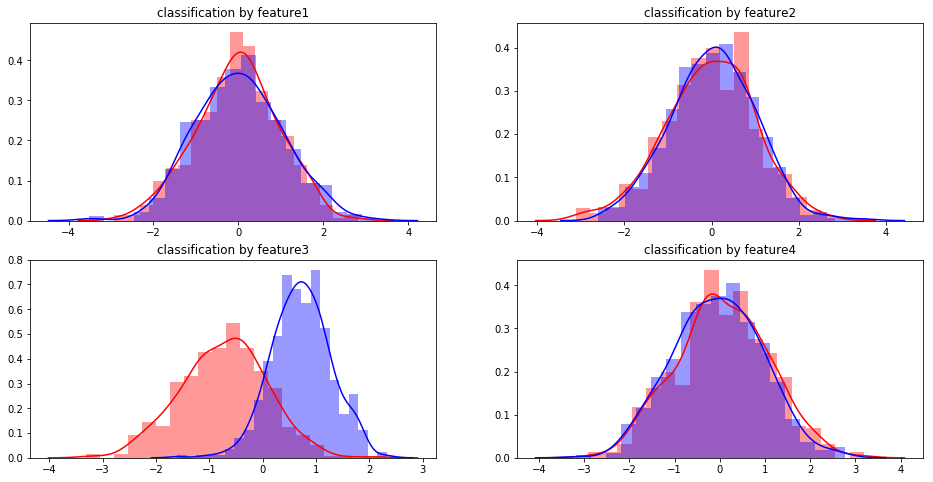

In [33]:
fig, ax = plt.subplots(2,2,figsize=(16, 8))
for i in range(2):
    for j in range(2):
        sns.distplot(X[y==0][:,i*2+j].ravel(), color='r',ax=ax[i,j])
        sns.distplot(X[y==1][:,i*2+j].ravel(), color='b',ax=ax[i,j])
        ax[i,j].set_title('classification by feature' +str(i*2+j+1))

看起来feature3确实是最利于分开两类样本的，给予feature3最大的权重，辅以其他三个feature的信息，就可以较好的区分开两类样本了。

## 模型评估

### 在测试集上预测样本类别

为了评估模型表现，我们需要对测试集样本进行预测，我们使用*predict*方法来预测样本类别，它会返回一个整数型array来表示不同的样本类别。

In [34]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0])

### Confusion matrix

最常用的评估分类模型表现的方法是构建一个[confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix).

Confusion matrix会总结模型正确和错误分类的样本数量，并将预测的样本分成如下四类： 

![Markdown](http://i1.fuimg.com/640680/fc92776744bf93b5.png)

* **Accuracy \(0 ~ 1\)** 

summarizes both positive and negative predictions, but is biased if the classes are imbalanced:

$$\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$$

* **Recall/sensitivity \(0 ~ 1\)**

summarizes how well the model finds out positive samples:

$$\text{Recall/Sensitivity} = \frac{TP}{TP + FN}$$

* **Precision/positive predictive value \(0 ~ 1\)** 

summarizes how well the model finds out negative samples:

$$\text{Precision/Positive Predictive Value} = \frac{TP}{TP + FP}$$

* **F1 score \(0 ~ 1\)** 

balances between positive predictive value \(PPV\) and true positive rate \(TPR\) and is more suitable for imbalanced dataset:

$$\text{F1 score} = 2 \frac{PPV \cdot TPR}{PPV + TPR}$$

* **Matthews correlation coefficient \(MCC\) \(-1 ~ 1\)** 

another metric that balances between recall and precision:

$$\text{MCC} = \frac{TP \times TN - FP \times FN} {(TP + FN)(TP + FP)(TN + FP)(TN + FN)}$$

#### 构建预测结果的Confusion matrix
#使用scikit-learn的confusion_matrix方法即可得到模型预测结果的confusion matrix


In [36]:
pd.DataFrame(confusion_matrix(y_test, y_pred), 
             columns=pd.Series(['Negative', 'Positive'], name='Predicted'),
             index=pd.Series(['Negative', 'Positive'], name='True'))

Predicted  Negative  Positive
True                         
Negative         94        14
Positive         13        79

In [37]:
scorers = {'accuracy': accuracy_score,
           'recall': recall_score,
           'precision': precision_score,
           'f1': f1_score,
           'mcc': matthews_corrcoef
}
for metric in scorers.keys():
    print('{} = {}'.format(metric, scorers[metric](y_test, y_pred)))

accuracy = 0.865
recall = 0.8586956521739131
precision = 0.8494623655913979
f1 = 0.854054054054054
mcc = 0.7285163232860473


### ROC曲线和Precision-Recall曲线

有时，一个固定的cutoff不足以评估模型性能。
Receiver Operating Characterisic（ROC）曲线和Precision-Recall曲线可以通过不同的cutoff评估模型的表现。 ROC曲线和Precision-Recall对于类别不平衡问题也有比较好的评估。与ROC曲线相比，recision-Recall曲线更适合类别极不平衡的数据集。

ROC曲线下面积（AUROC）或average precision (AP)是一个单值，它总结了不同截止值下的模型平均表现，常常用于报告模型的分类表现。

#### 绘制ROC曲线和Precision-Recall曲线
我们使用sklearn自带的*roc_curve*和*precision_recall_curve*方法来计算绘图需要的指标，这两个方法需要的输入为测试集每个样本的真实标签和模型预测的每个样本的概率。

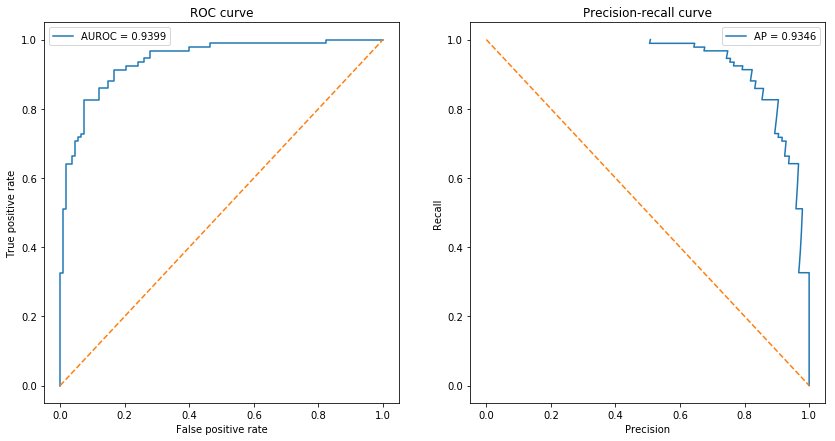

In [38]:
fig, axes = plt.subplots(1, 2, figsize=(14, 7))
# ROC curve
y_score = model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_score[:, 1])
ax = axes[0]
ax.plot(fpr, tpr, label='AUROC = {:.4f}'.format(roc_auc_score(y_test, y_score[:, 1])))
ax.plot([0, 1], [0, 1], linestyle='dashed')
ax.set_xlabel('False positive rate')
ax.set_ylabel('True positive rate')
ax.set_title('ROC curve')
ax.legend()
# predision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_score[:, 1])
ax = axes[1]
ax.plot(precision, recall, label='AP = {:.4f}'.format(average_precision_score(y_test, y_score[:, 1])))
ax.plot([0, 1], [1, 0], linestyle='dashed')
ax.set_xlabel('Precision')
ax.set_ylabel('Recall')
ax.set_title('Precision-recall curve')
ax.legend()

可以看到AUROC和AP都接近于1，可以认为模型的分类效果很好。

## 交叉验证

交叉验证可以被用于在训练集中再随机划分出一部分验证集用于挑选模型的参数，也可以用于直接评估模型的表现。

对于非常大的数据集，将数据集单独拆分为训练集和测试集就足够来评估模型性能。但是，对于小型数据集，测试样本仅代表一小部分未来预测中可能的样本，即对于小数据集，划分出的测试集可能因为样本数过少而不具有代表性。


### K折（k-folds）交叉验证

交叉验证是小型数据集模型评估的常用技术。
在**k折交叉验证**中，数据集被均匀地划分为*k*个部分（folds）。
在每轮验证中，模型在一个fold上进行测试，并在剩余的*（k-1）/ k *部分上进行训练。 

K折交叉验证确保训练样本和测试样本之间没有重叠，K轮结束后，每个样本会被设置为测试样品一次。最后，模型平均表现是在* k*轮次中计算的。



*scikit-learn*提供很多功能来[划分数据集]
(http://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection).

这里我们使用[KFold](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html)
来将数据集划分为10折，5和10是交叉验证中经常使用的折数。如果样本数量和计算资源允许，一般设置为10折。

下面的代码展示*KFold*是如何划分数据集的，图片中每一行为一个轮次，每一行中黑色的box为该轮次的测试集

注意我们是在训练集（80%样本）上进行交叉验证的。

Text(0.5, 0, 'Sample')

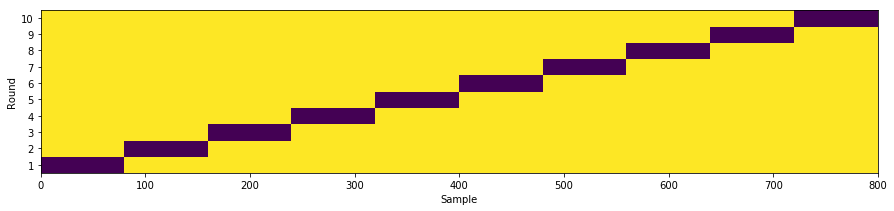

In [39]:
n_splits = 10

kfold = KFold(n_splits=n_splits, random_state=random_state)
is_train = np.zeros((n_splits, X_train.shape[0]), dtype=np.bool)
for i, (train_index, test_index) in enumerate(kfold.split(X_train, y_train)):
    is_train[i, train_index] = 1

fig, ax = plt.subplots(figsize=(15, 3))
ax.pcolormesh(is_train)
ax.set_yticks(np.arange(n_splits) + 0.5)
ax.set_yticklabels(np.arange(n_splits) + 1)
ax.set_ylabel('Round')
ax.set_xlabel('Sample')

In [40]:
predictions = np.zeros((n_splits, X_train.shape[0]), dtype=np.int32)
predicted_scores = np.zeros((n_splits, X_train.shape[0]))

for i in range(n_splits):
    model.fit(X_train[is_train[i]], y_train[is_train[i]])
    predictions[i] = model.predict(X_train)
    predicted_scores[i] = model.predict_proba(X_train)[:, 1]

### Collect evaluation metrics

我们统计了模型10折交叉验证的指标

In [41]:
cv_metrics = pd.DataFrame(np.zeros((n_splits*2, len(scorers) + 2)),
                          columns=list(scorers.keys()) + ['roc_auc', 'average_precision'])
cv_metrics.loc[:, 'dataset'] = np.empty(n_splits*2, dtype='U')
for i in range(n_splits):
    for metric in scorers.keys():
        cv_metrics.loc[i*2 + 0, metric] = scorers[metric](y_train[is_train[i]], predictions[i, is_train[i]])
        cv_metrics.loc[i*2 + 1, metric] = scorers[metric](y_train[~is_train[i]], predictions[i, ~is_train[i]])
    cv_metrics.loc[i*2 + 0, 'roc_auc'] = roc_auc_score(y_train[is_train[i]], predicted_scores[i, is_train[i]])
    cv_metrics.loc[i*2 + 1, 'roc_auc'] = roc_auc_score(y_train[~is_train[i]], predicted_scores[i, ~is_train[i]])
    cv_metrics.loc[i*2 + 0, 'average_precision'] = average_precision_score(y_train[is_train[i]], 
                                                                           predicted_scores[i, is_train[i]])
    cv_metrics.loc[i*2 + 1, 'average_precision'] = average_precision_score(y_train[~is_train[i]], 
                                                                           predicted_scores[i, ~is_train[i]])
    cv_metrics.loc[i*2 + 0, 'dataset'] = 'train'
    cv_metrics.loc[i*2 + 1, 'dataset'] = 'valid'

cv_metrics

accuracy    recall  precision        f1       mcc   roc_auc  \
0   0.883333  0.905405   0.872396  0.888594  0.766816  0.946463   
1   0.812500  0.897436   0.760870  0.823529  0.636144  0.868043   
2   0.869444  0.894879   0.857881  0.875989  0.739023  0.934460   
3   0.937500  0.921053   0.945946  0.933333  0.874805  0.988722   
4   0.879167  0.910326   0.861183  0.885073  0.759197  0.939106   
5   0.912500  0.926829   0.904762  0.915663  0.825039  0.938086   
6   0.877778  0.898630   0.865435  0.881720  0.755949  0.936793   
7   0.912500  0.954545   0.893617  0.923077  0.824288  0.968434   
8   0.887500  0.913043   0.872727  0.892430  0.775520  0.943205   
9   0.775000  0.780488   0.780488  0.780488  0.549719  0.898061   
10  0.884722  0.909341   0.868766  0.888591  0.770155  0.944901   
11  0.825000  0.800000   0.878049  0.837209  0.652193  0.898413   
12  0.884722  0.911290   0.871465  0.890933  0.769687  0.942737   
13  0.862500  0.918919   0.809524  0.860759  0.731724  0.918919   
14  0.881944  0.908108   0.868217  0.887715  0.764252  0.937629   
15  0.875000  0.948718   0.822222  0.880952  0.759316  0.964978   
16  0.873611  0.897790   0.857520  0.877193  0.747983  0.938193   
17  0.912500  0.914894   0.934783  0.924731  0.820553  0.948420   
18  0.879167  0.908356   0.864103  0.885677  0.758779  0.935117   
19  0.900000  0.921053   0.875000  0.897436  0.801002  0.975564   

    average_precision dataset  
0            0.925063   train  
1            0.830560   valid  
2            0.912855   train  
3            0.988752   valid  
4            0.915114   train  
5            0.933315   valid  
6            0.912399   train  
7            0.972625   valid  
8            0.919590   train  
9            0.882059   valid  
10           0.923092   train  
11           0.891197   valid  
12           0.933763   train  
13           0.826008   valid  
14           0.913072   train  
15           0.965658   valid  
16           0.913858   train  
17           0.953748   valid  
18           0.912495   train  
19           0.975132   valid

### 总结评估指标

我们评估多轮交叉验证的平均指标如下：

In [42]:
cv_metrics_mean = cv_metrics.groupby('dataset').mean()
cv_metrics_mean

accuracy    recall  precision        f1       mcc   roc_auc  \
dataset                                                                
train    0.880139  0.905717   0.865969  0.885391  0.760736  0.939860   
valid    0.872500  0.898393   0.860526  0.877718  0.747478  0.936764   

         average_precision  
dataset                     
train             0.918130  
valid             0.921905

接下来我们绘制散点图来展示模型七个指标：*accuracy,recall,precision,f1,mcc,roc_auc,average_precision*分别在十折交叉验证中的值：

Text(0.5, 1.0, 'Model performance using 10-fold cross-validation')

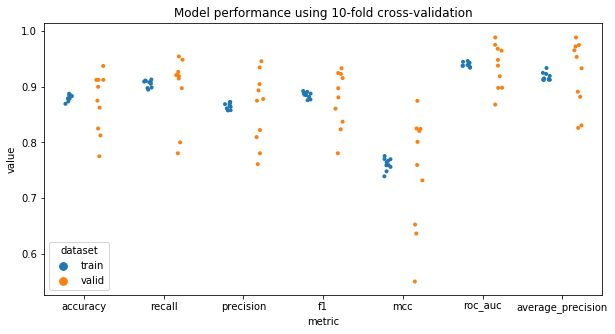

In [44]:
fig, ax = plt.subplots(figsize=(10, 5))
plot_data = pd.melt(cv_metrics, id_vars=['dataset'], var_name='metric', value_name='value')
sns.stripplot(x='metric', y='value', hue='dataset', 
              dodge=True, jitter=True, data=plot_data, size=4, ax=ax)
#sns.pointplot(x='metric', y='value', hue='dataset', data=plot_data, markers="d", 
#              join=False, ci=None, ax=ax, dodge=True, palette='dark')
ax.set_title('Model performance using 10-fold cross-validation')

### ROC 和 PR 曲线

对每一轮交叉验证结果，我们都可以绘制一条ROC/PR曲线，当我们把十条曲线绘制在一起时，更好的方法是绘制十轮结果的均值曲线，以及用阴影区域表示十轮结果的置信区间。
> tips: Anaconda并没有集成seaborn的最新版本，如果运行代码时报错，请使用pip更新seaborn：`pip install seaborn==0.9.0`

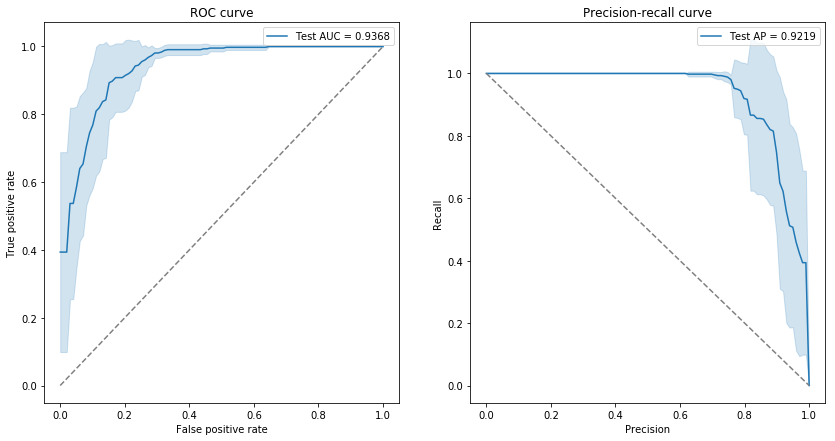

In [46]:
from scipy import interp

fig, axes = plt.subplots(1, 2, figsize=(14, 7))
# ROC curve
ax = axes[0]
all_fprs = np.linspace(0, 1, 100)
roc_curves = np.zeros((n_splits, len(all_fprs), 2))
for i in range(n_splits):
    fpr, tpr, thresholds = roc_curve(y_train[~is_train[i]], predicted_scores[i, ~is_train[i]])
    roc_curves[i, :, 0] = all_fprs
    roc_curves[i, :, 1] = interp(all_fprs, fpr, tpr)
roc_curves = pd.DataFrame(roc_curves.reshape((-1, 2)), columns=['fpr', 'tpr'])
sns.lineplot(x='fpr', y='tpr', data=roc_curves, ci='sd', ax=ax,
             label='Test AUC = {:.4f}'.format(cv_metrics_mean.loc['valid', 'roc_auc']))
#ax.plot(fpr, tpr, label='ROAUC = {:.4f}'.format(roc_auc_score(y_test, y_score[:, 1])))
#ax.plot([0, 1], [0, 1], linestyle='dashed')
ax.set_xlabel('False positive rate')
ax.set_ylabel('True positive rate')
ax.plot([0, 1], [0, 1], linestyle='dashed', color='gray')
ax.set_title('ROC curve')
ax.legend()

# predision-recall curve
ax = axes[1]
all_precs = np.linspace(0, 1, 100)
pr_curves = np.zeros((n_splits, len(all_precs), 2))
for i in range(n_splits):
    fpr, tpr, thresholds = precision_recall_curve(y_train[~is_train[i]], predicted_scores[i, ~is_train[i]])
    pr_curves[i, :, 0] = all_precs
    pr_curves[i, :, 1] = interp(all_precs, fpr, tpr)
pr_curves = pd.DataFrame(pr_curves.reshape((-1, 2)), columns=['precision', 'recall'])
sns.lineplot(x='precision', y='recall', data=pr_curves, ci='sd', ax=ax,
             label='Test AP = {:.4f}'.format(cv_metrics_mean.loc['valid', 'average_precision']))

ax.set_xlabel('Precision')
ax.set_ylabel('Recall')
ax.plot([0, 1], [1, 0], linestyle='dashed', color='gray')
ax.set_title('Precision-recall curve')
ax.legend()

# 实战 乳腺癌预测
本部分会比上一部分更简单，更重要的是，你会很容易地发现简单的机器学习实战中的大量重复的代码的套路：重复的调用模型方式和绘图分析

* 1= Malignant (Cancerous) - Present
* 0= Benign (Not Cancerous) - Absent


### 1.3 Get the Data
The [Breast Cancer](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29) datasets is available machine learning repository maintained by the University of California, Irvine. The dataset contains **569 samples of malignant and benign tumor cells**. 
* The first two columns in the dataset store the unique ID numbers of the samples and the corresponding diagnosis (M=malignant, B=benign), respectively. 
* The columns 3-32 contain 30 real-value features that have been computed from digitized images of the cell nuclei, which can be used to build a model to predict whether a tumor is benign or malignant.

Ten real-valued features are computed for each cell nucleus:

	a) radius (mean of distances from center to points on the perimeter)
	b) texture (standard deviation of gray-scale values)
	c) perimeter
	d) area
	e) smoothness (local variation in radius lengths)
	f) compactness (perimeter^2 / area - 1.0)
	g) concavity (severity of concave portions of the contour)
	h) concave points (number of concave portions of the contour)
	i) symmetry 
	j) fractal dimension ("coastline approximation" - 1)

In [5]:
# read the data
all_df = pd.read_csv('data/data.csv', index_col=False)
all_df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

In [6]:
all_df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [7]:
# Id column is redundant and not useful, we want to drop it
all_df.drop('id', axis=1, inplace=True)

### 1.4 Quick Glance on the Data

In [8]:
# The info() method is useful to get a quick description of the data, in particular the total number of rows, 
# and each attribute’s type and number of non-null values
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 n

In [9]:
all_df.describe()

radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean  ...  radius_worst  \
count     569.000000              569.000000  ...    569.000000   
mean        0.181162                0.062798  ...     16.269190   
std         0.027414                0.007060  ...      4.833242   
min         0.106000                0.049960  ...      7.930000   
25%         0.161900                0.057700  ...     13.010000   
50%         0.179200                0.061540  ...     14.970000   
75%         0.195700                0.066120  ...     18.790000   
max         0.304000                0.097440  ...     36.040000   

       texture_worst  perimeter_worst   area_worst  smoothness_worst  \
count     569.000000       569.000000   569.000000        569.000000   
mean       25.677223       107.261213   880.583128          0.132369   
std         6.146258        33.602542   569.356993          0.022832   
min        12.020000        50.410000   185.200000          0.071170   
25%        21.080000        84.110000   515.300000          0.116600   
50%        25.410000        97.660000   686.500000          0.131300   
75%        29.720000       125.400000  1084.000000          0.146000   
max        49.540000       251.200000  4254.000000          0.222600   

       compactness_worst  concavity_worst  concave points_worst  \
count         569.000000       569.000000            569.000000   
mean            0.254265         0.272188              0.114606   
std             0.157336         0.208624              0.065732   
min             0.027290         0.000000              0.000000   
25%             0.147200         0.114500              0.064930   
50%             0.211900         0.226700              0.099930   
75%             0.339100         0.382900              0.161400   
max             1.058000         1.252000              0.291000   

       symmetry_worst  fractal_dimension_worst  
count      569.000000               569.000000  
mean         0.290076                 0.083946  
std          0.061867                 0.018061  
min          0.156500                 0.055040  
25%          0.250400                 0.071460  
50%          0.282200                 0.080040  
75%          0.317900                 0.092080  
max          0.663800                 0.207500  

[8 rows x 30 columns]

注意到除了诊断信息，其他信息都已经数值化了

In [10]:
# check the categorical attribute's distribution
all_df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

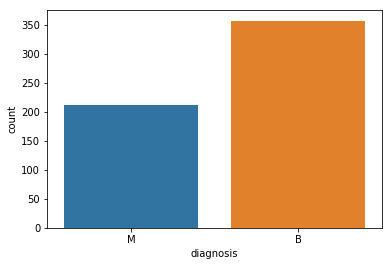

In [11]:
sns.countplot(x="diagnosis", data=all_df);

### "_mean" suffix features 直方图

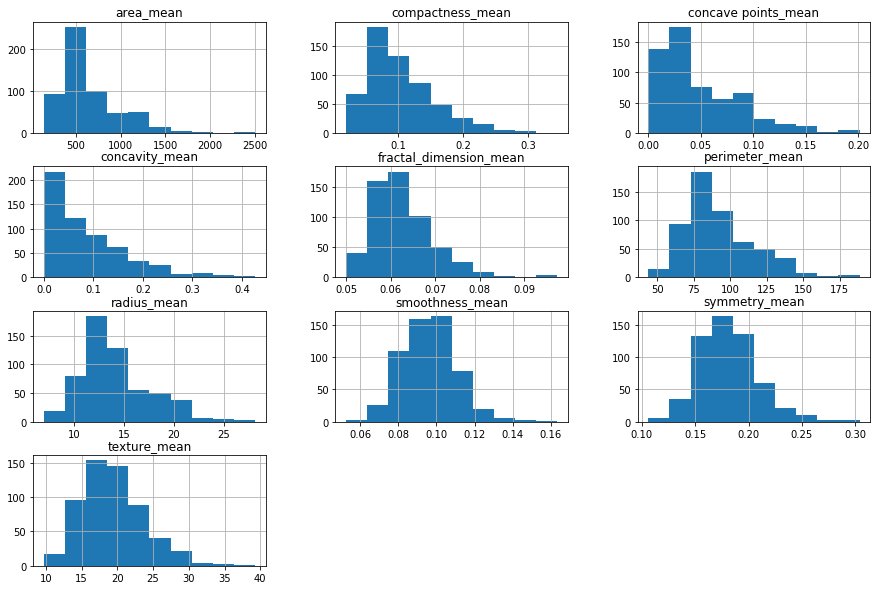

In [12]:
data_mean = all_df.iloc[:, 1:11]
data_mean.hist(bins=10, figsize=(15, 10), grid=True);

### Histogram the "_se" suffix features

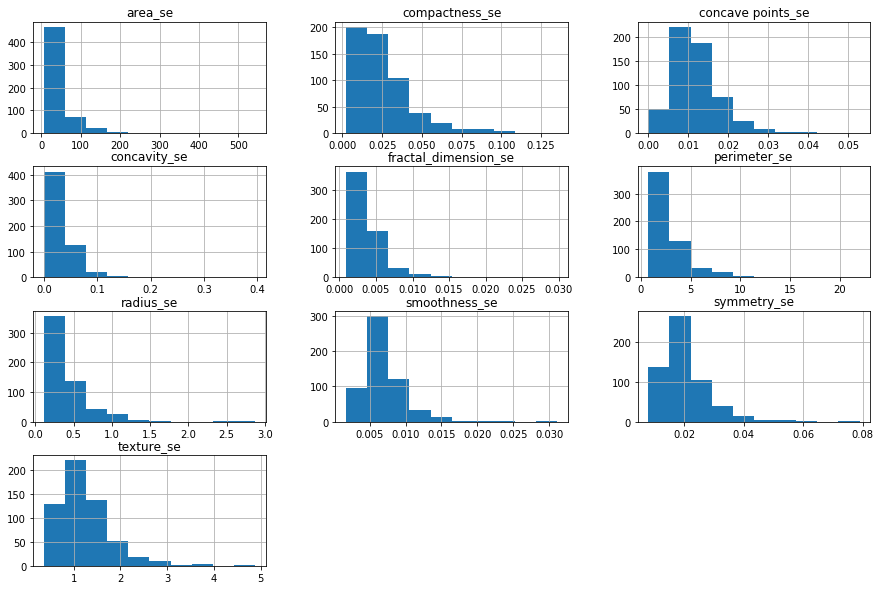

In [13]:
data_mean = all_df.iloc[:, 11:21]
data_mean.hist(bins=10, figsize=(15, 10), grid=True);

### Histogram the "_worst" suffix features

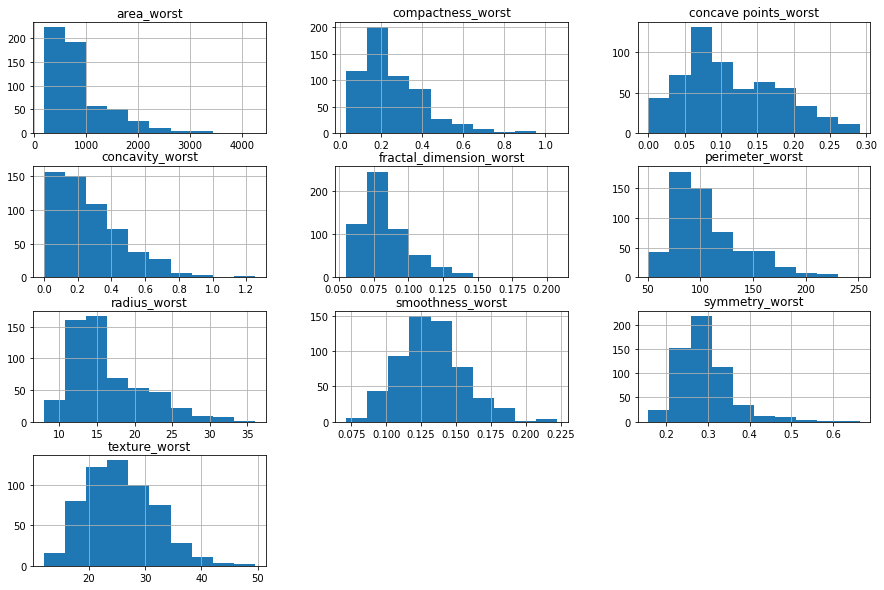

In [14]:
data_mean = all_df.iloc[:, 21:]
data_mean.hist(bins=10, figsize=(15, 10), grid=True);

**Observation**

**concavity** and **area** 可能服从exponential distribution ( ). 

**texture**, **smooth** and **symmetry** 可能服从Gaussian distribution.

### Density plots of the "_mean" suffix features

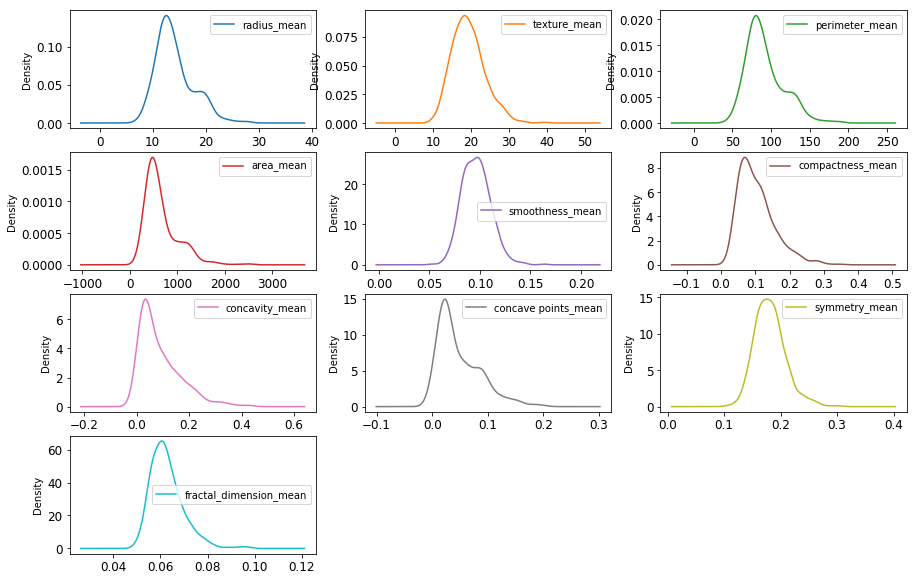

In [15]:
data_mean = all_df.iloc[:, 1:11]
data_mean.plot(kind='density', subplots=True, layout=(4,3), sharex=False, sharey=False, fontsize=12, figsize=(15,10));

### Density plots of the "_se" suffix features

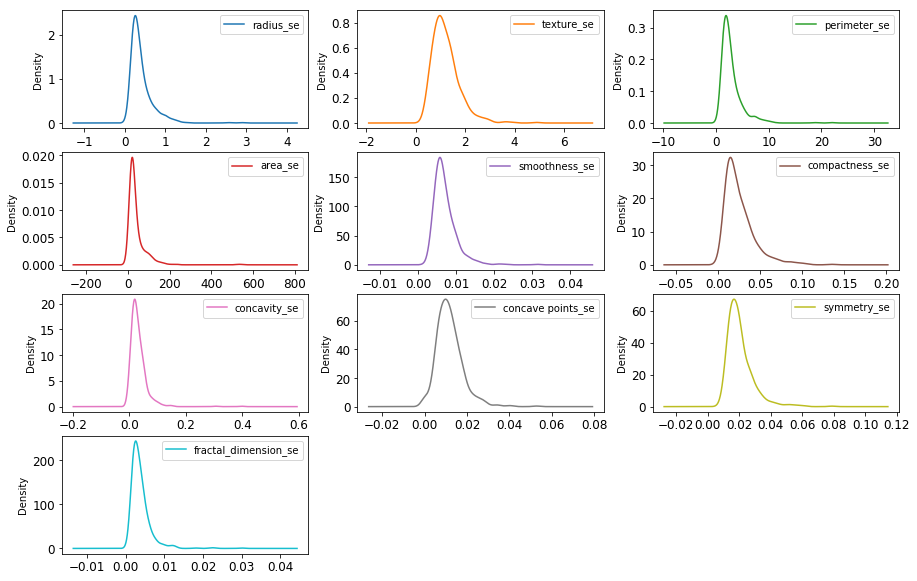

In [16]:
data_mean = all_df.iloc[:, 11:21]
data_mean.plot(kind='density', subplots=True, layout=(4,3), sharex=False, sharey=False, fontsize=12, figsize=(15,10));

### Density plots of the "_worst" suffix features

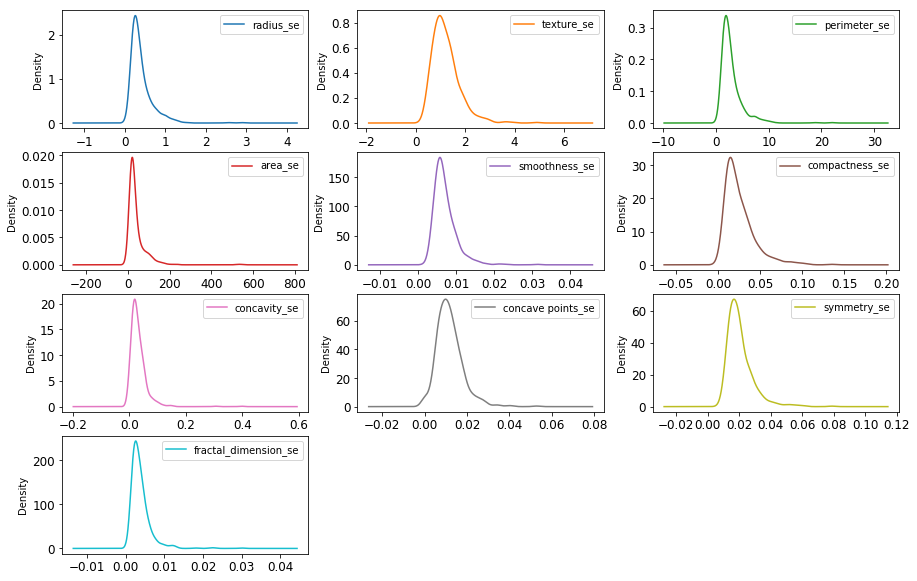

In [17]:
all_df.iloc[:, 21:]
data_mean.plot(kind='density', subplots=True, layout=(4,3), sharex=False, sharey=False, fontsize=12, figsize=(15,10));

### 2.2.3. Visualize distribution of data via Box plots

### Box plots of the "_mean" suffix features

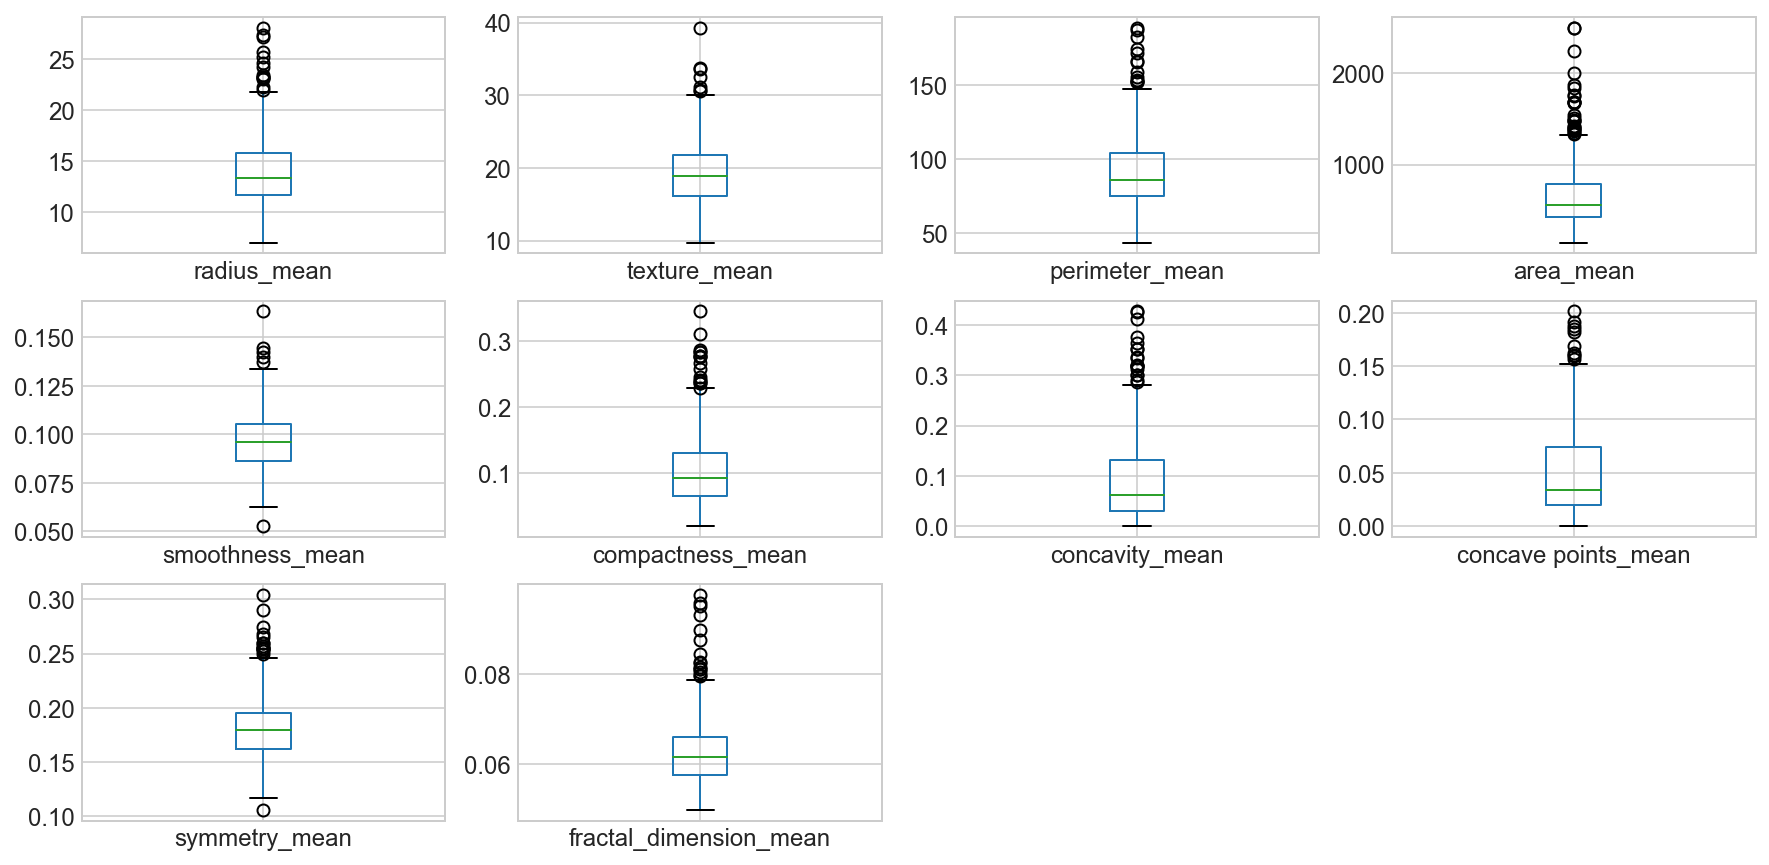

In [21]:
data_mean = all_df.iloc[:, 1:11]
data_mean.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, fontsize=12, figsize=(15,10));

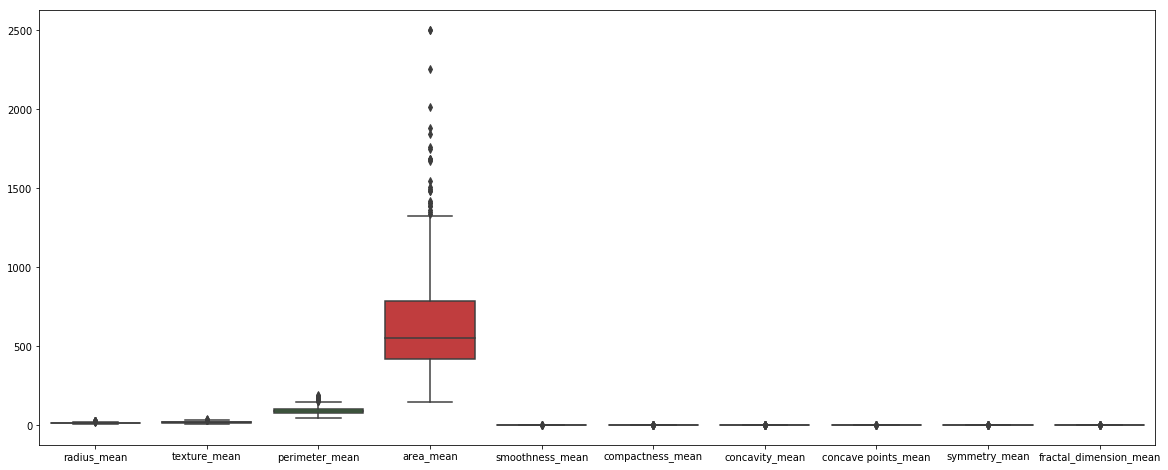

In [22]:
fig,ax=plt.subplots(1,figsize=(20,8))
sns.boxplot(data=all_df.iloc[:, 1:11],ax=ax)

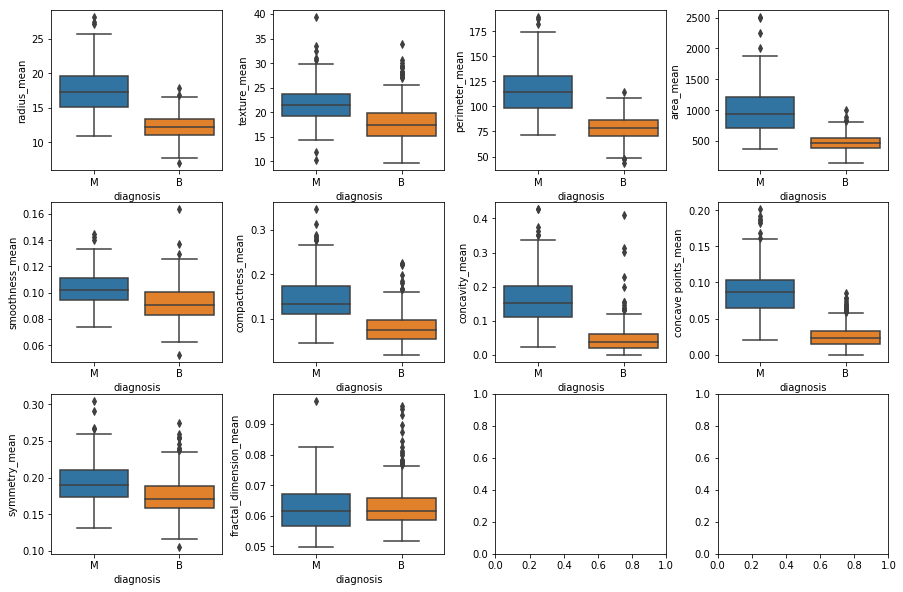

In [23]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15,10))
fig.subplots_adjust(hspace =.2, wspace=.3)
axes = axes.ravel()
for i, col in enumerate(all_df.columns[1:11]):
    _= sns.boxplot(y=col, x='diagnosis', data=all_df, ax=axes[i])

### Box plots of the "_se" suffix features

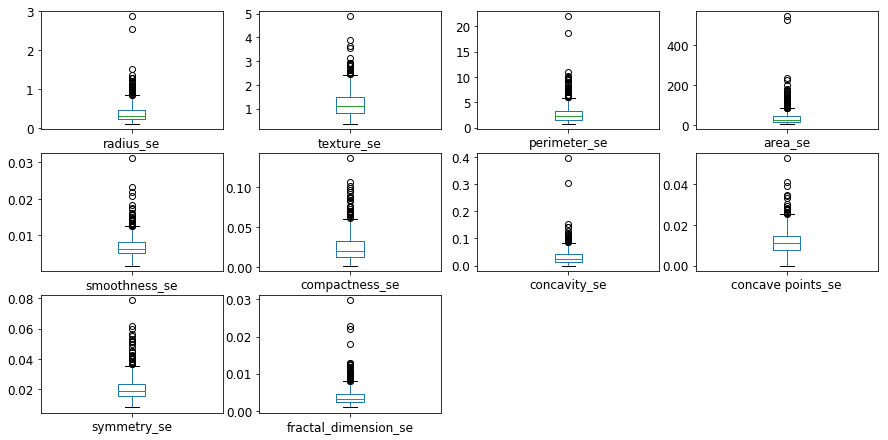

In [24]:
data_mean = all_df.iloc[:, 11:21]
data_mean.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, fontsize=12, figsize=(15,10));

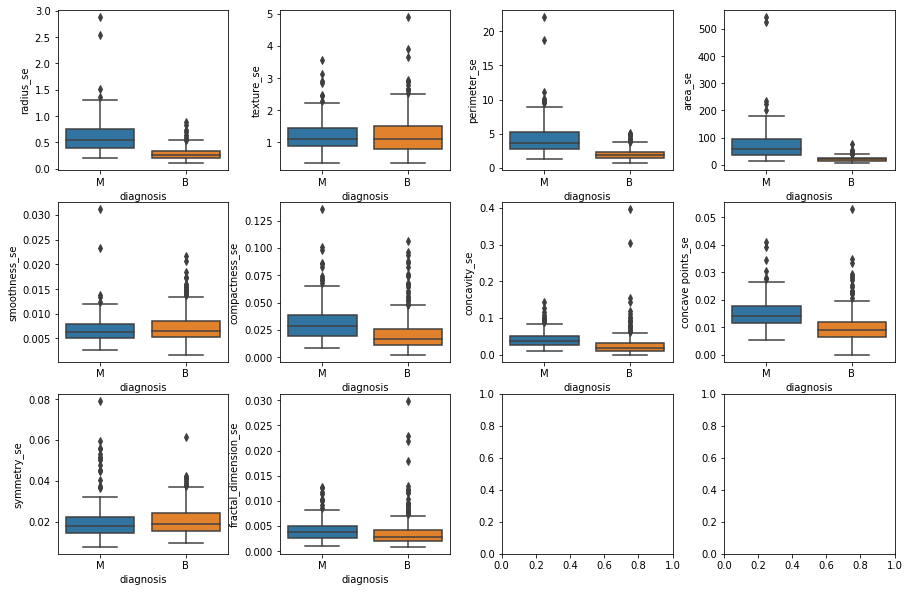

In [25]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15,10))
fig.subplots_adjust(hspace =.2, wspace=.3)
axes = axes.ravel()
for i, col in enumerate(all_df.columns[11:21]):
    _= sns.boxplot(y=col, x='diagnosis', data=all_df, ax=axes[i])

### Box plots of the "_worst" suffix features

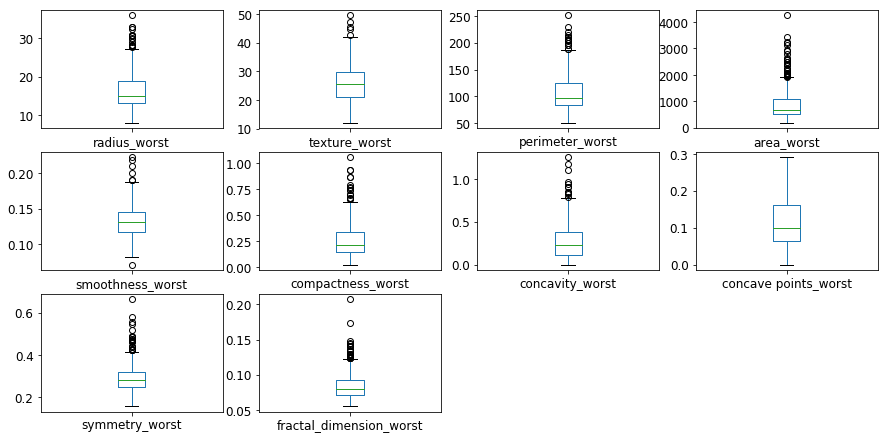

In [26]:
data_mean = all_df.iloc[:, 21:]
data_mean.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, fontsize=12, figsize=(15,10));

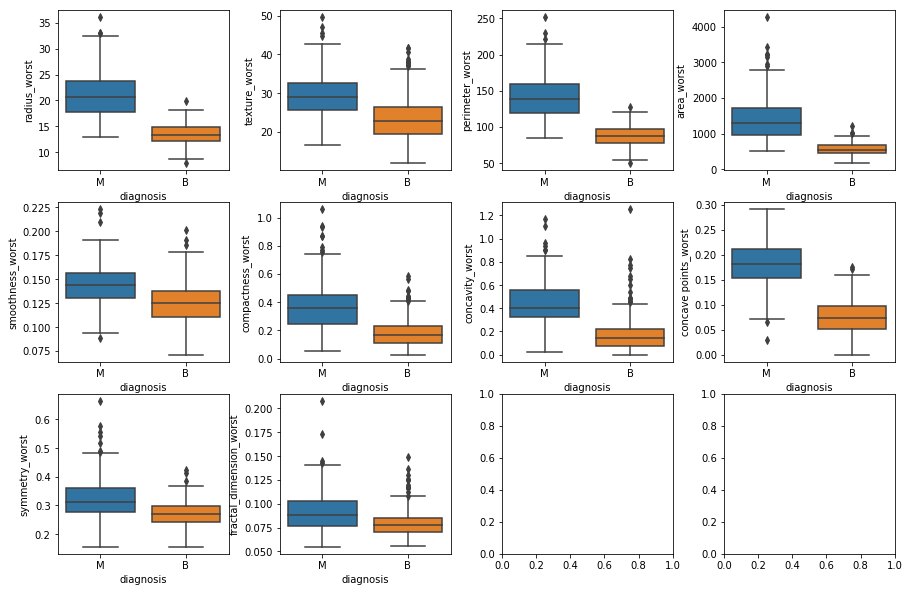

In [27]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15,10))
fig.subplots_adjust(hspace =.2, wspace=.3)
axes = axes.ravel()
for i, col in enumerate(all_df.columns[21:]):
    _= sns.boxplot(y=col, x='diagnosis', data=all_df, ax=axes[i])

### Correlation Matrix

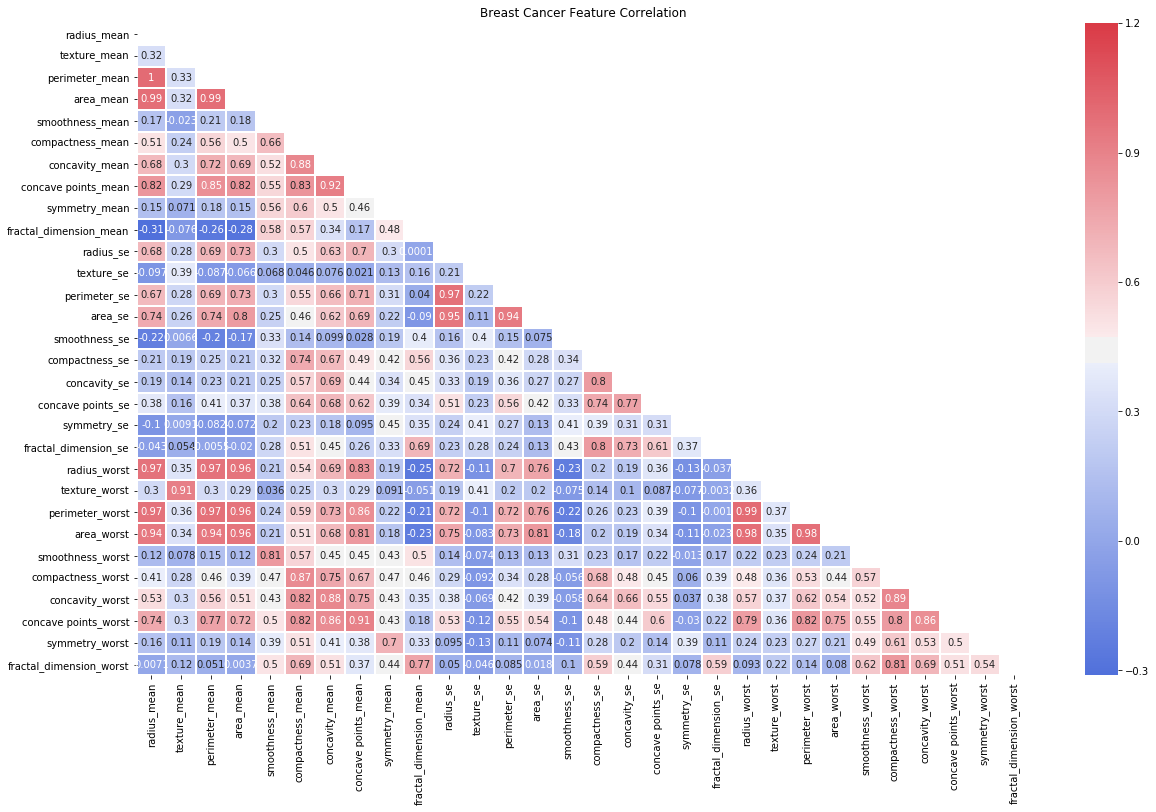

In [28]:
# Compute the correlation matrix
corrMatt = all_df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corrMatt)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(20, 12))
plt.title('Breast Cancer Feature Correlation')

# Generate a custom diverging colormap
cmap = sns.diverging_palette(260, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corrMatt, vmax=1.2, square=False, cmap=cmap, mask=mask, ax=ax, annot=True, fmt='.2g', linewidths=1);
#sns.heatmap(corrMatt, mask=mask, vmax=1.2, square=True, annot=True, fmt='.2g', ax=ax);

**Observation:**

可以发现 mean values 的相关性都比较大 between 1 - 0.75.
* The mean area of the tissue nucleus has a strong positive correlation with mean values of radius and parameter.
* Some paramters are moderately positive correlated (r between 0.5-0.75) are concavity and area, concavity and perimeter etc.
* Likewise, we see some strong negative correlation between fractal_dimension with radius, texture, perimeter mean values.

### Scatter plots of the "_mean" suffix features

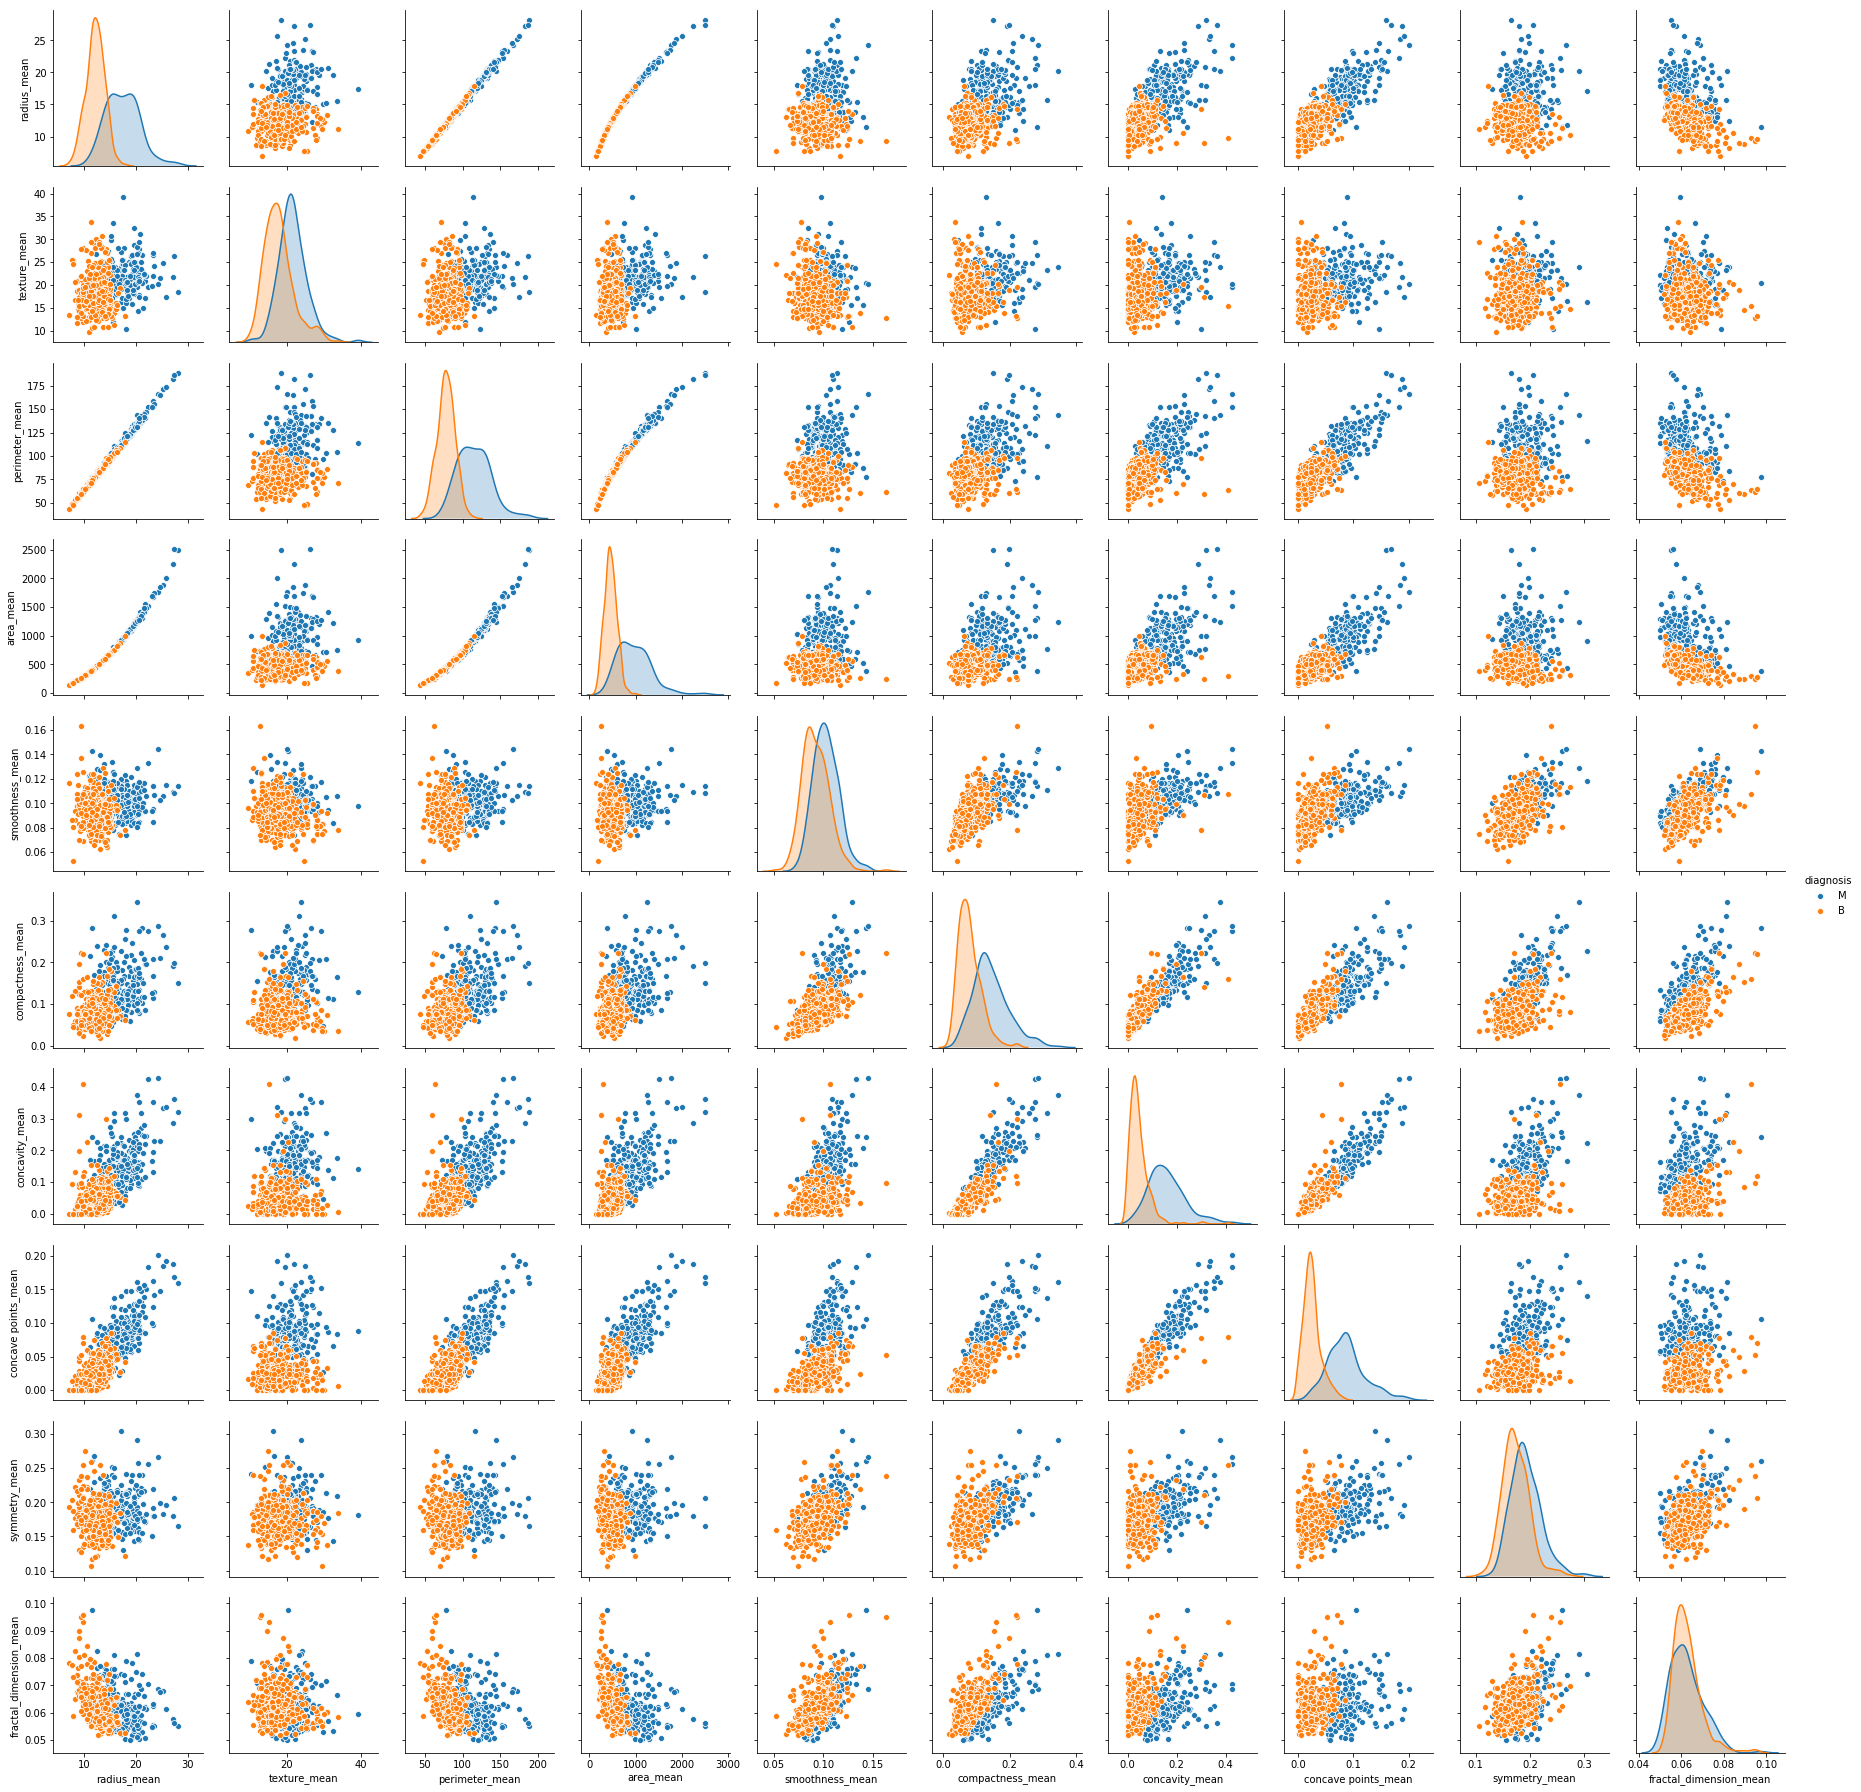

In [29]:
sns.pairplot(all_df[list(all_df.columns[1:11]) + ['diagnosis']], hue="diagnosis");

### Scatter plots of the "_se" suffix features

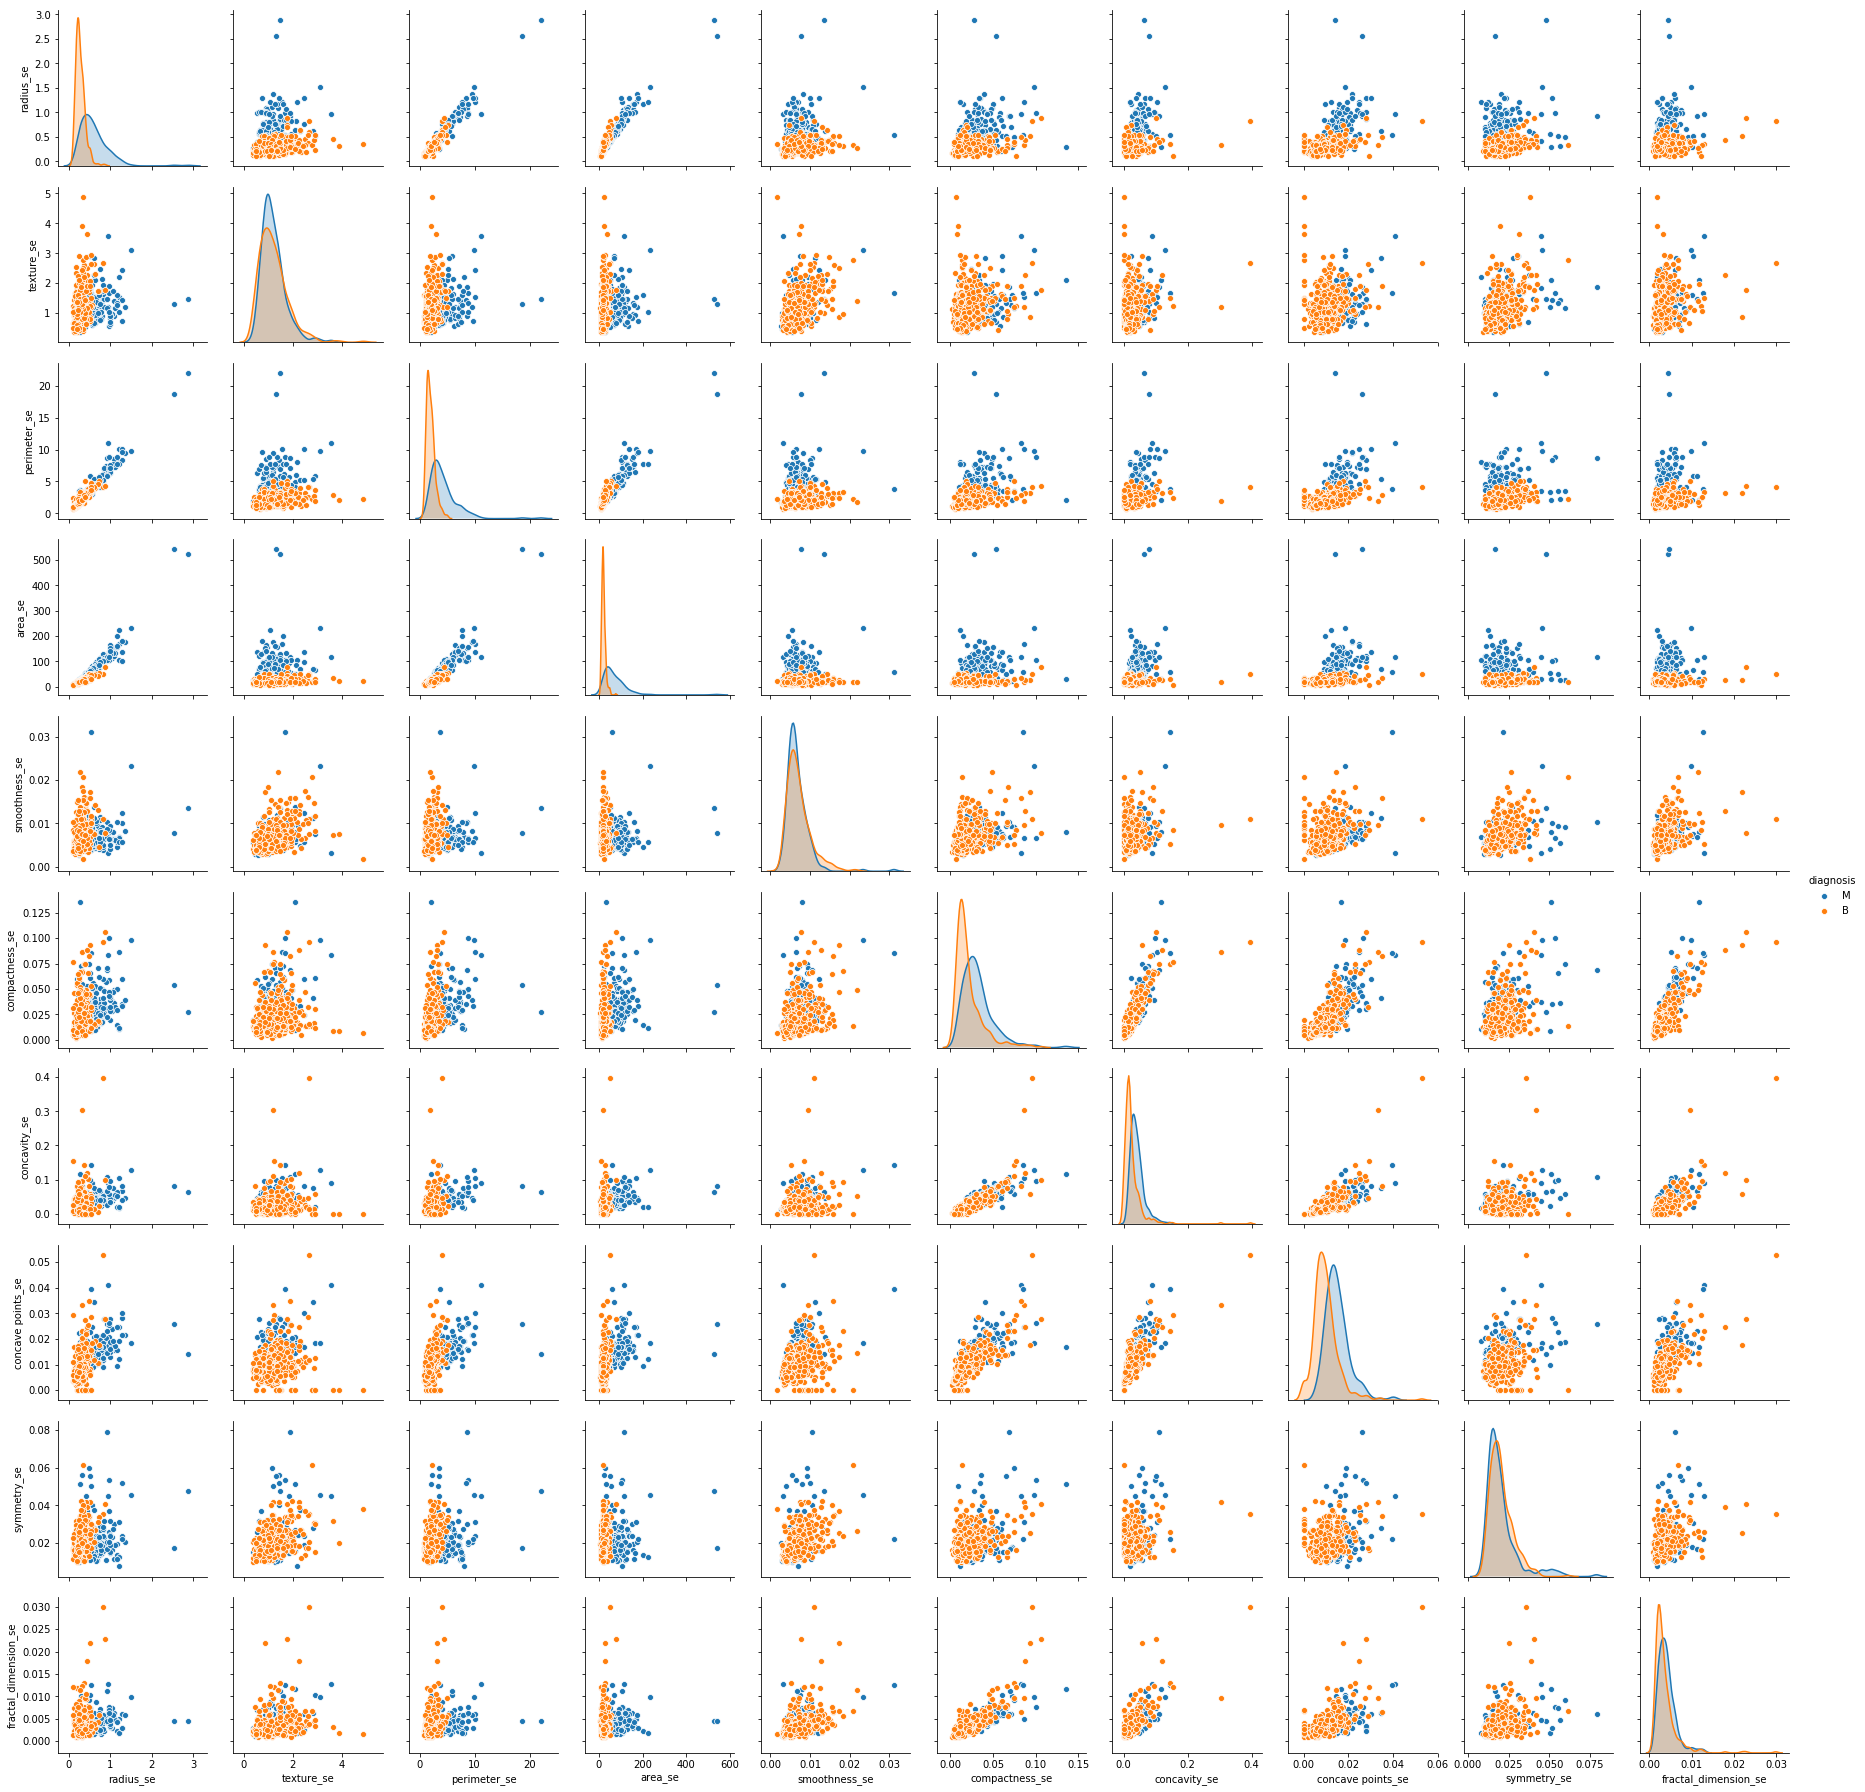

In [30]:
sns.pairplot(all_df[list(all_df.columns[11:21]) + ['diagnosis']], hue="diagnosis");

### Scatter plots of the "_worst" suffix features

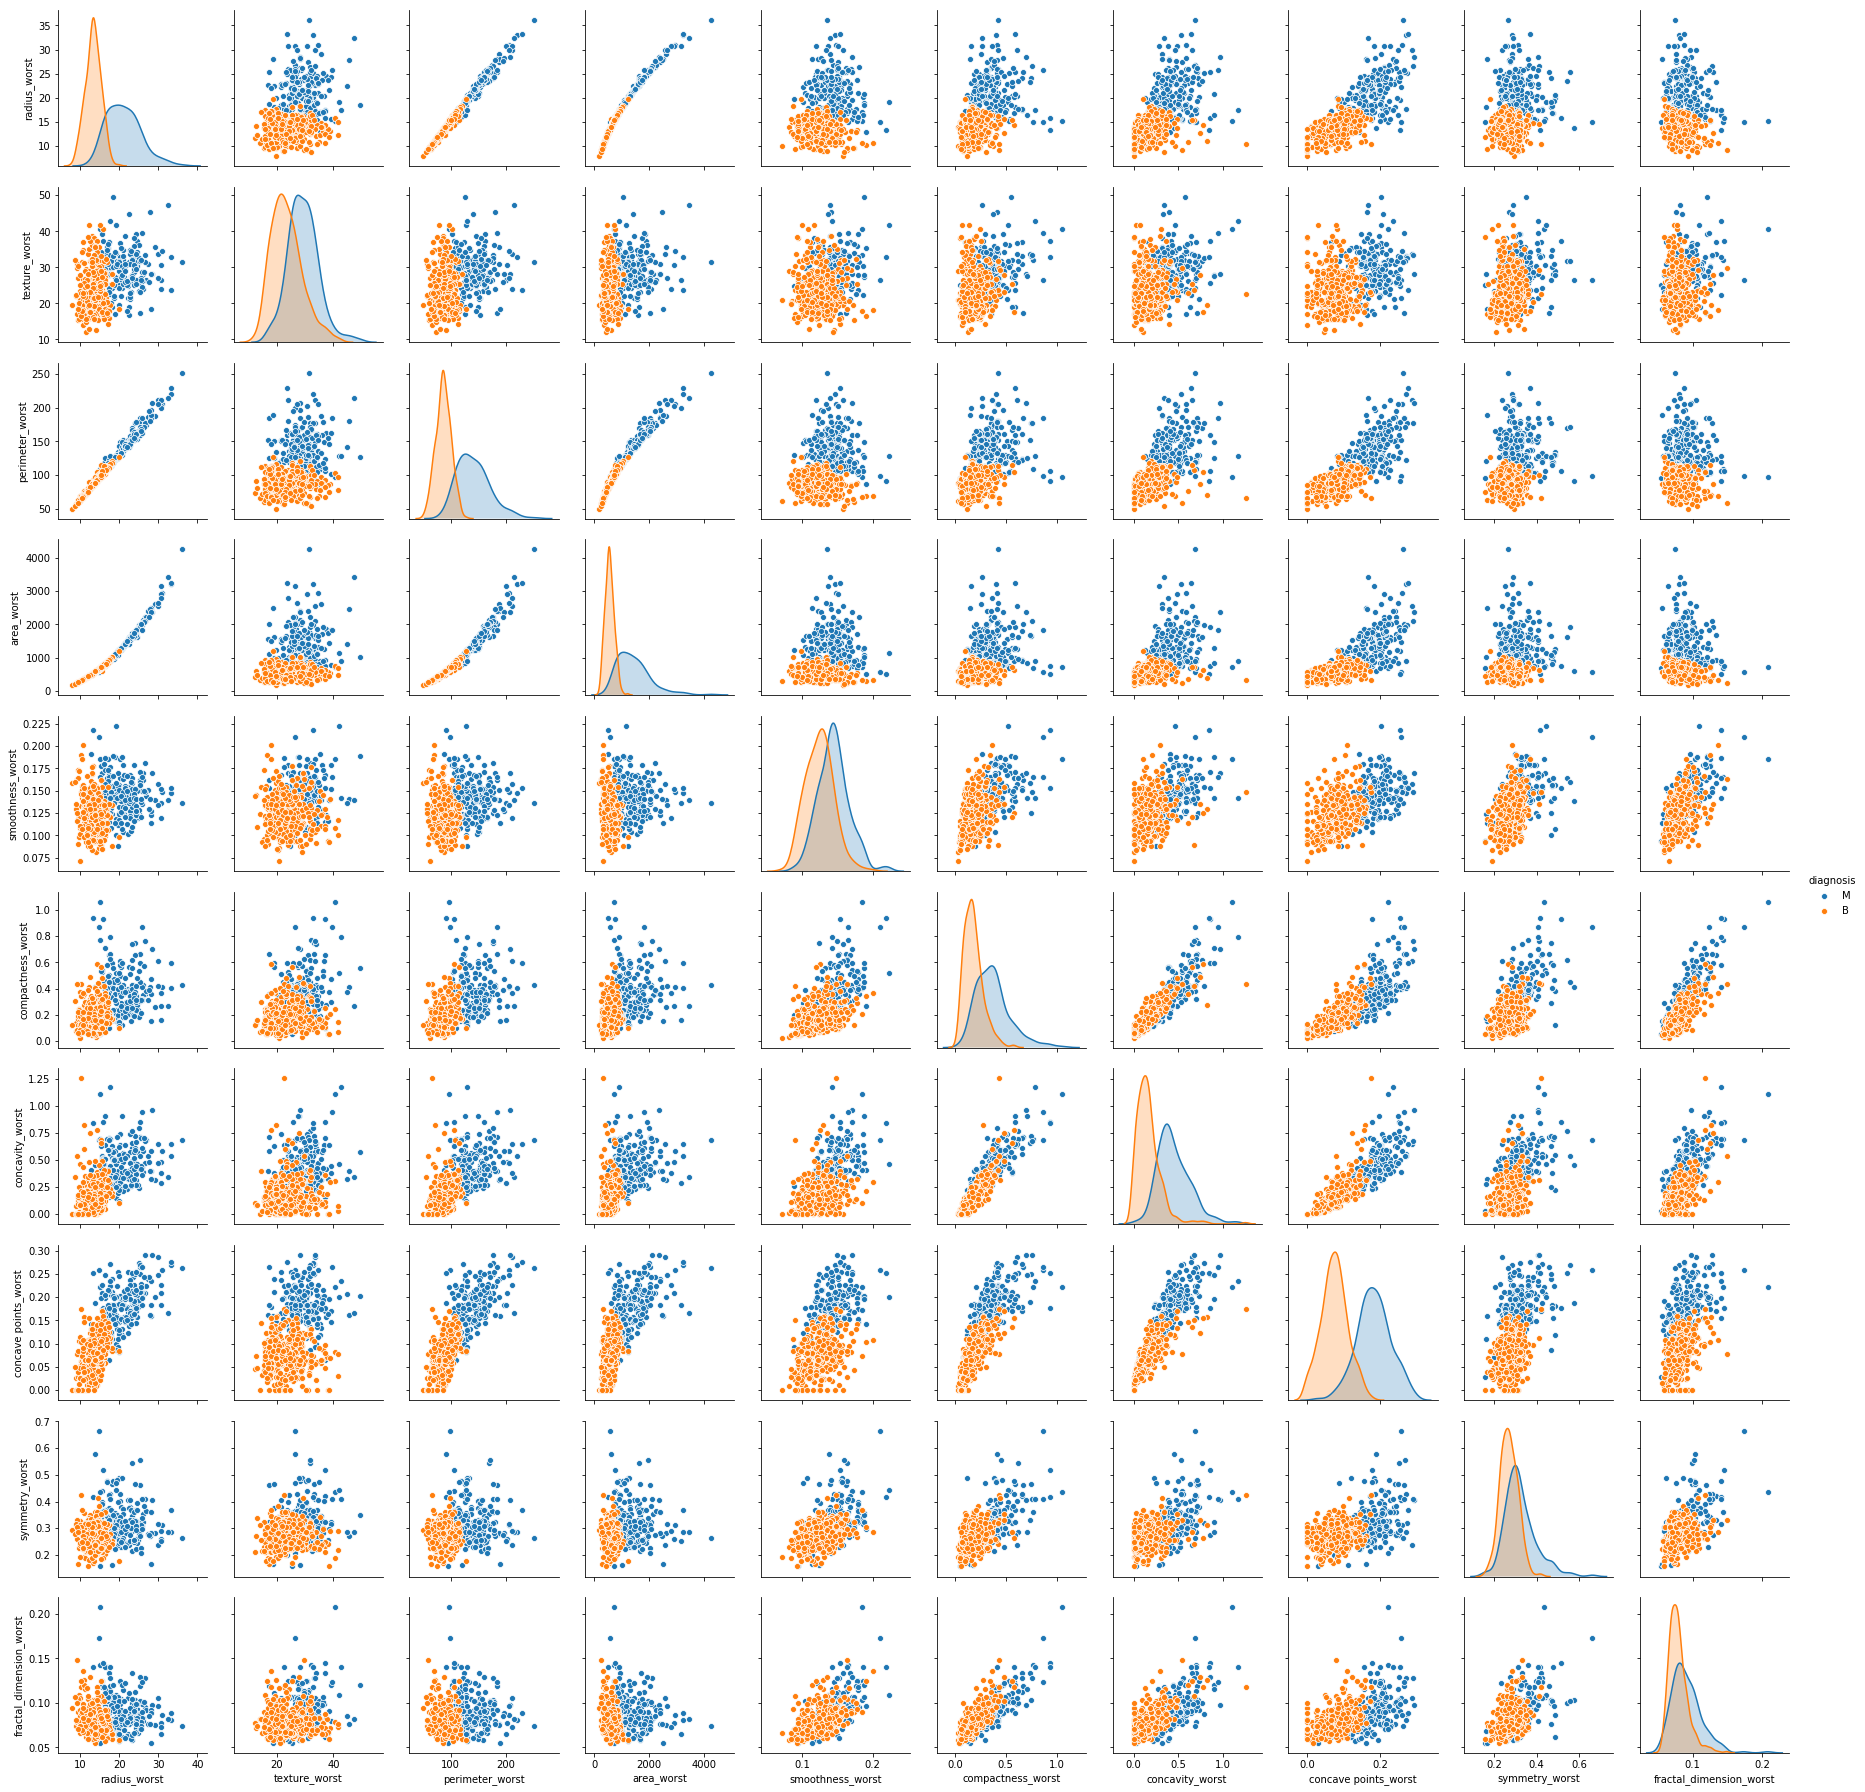

In [31]:
sns.pairplot(all_df[list(all_df.columns[21:]) + ['diagnosis']], hue="diagnosis");

**Summary**

* Mean values of cell radius, perimeter, area, compactness, concavity and concave points can be used in classification of the cancer. Larger values of these parameters tends to show a correlation with malignant tumors.
* Mean values of texture, smoothness, symmetry or fractual dimension does not show a particular preference of one diagnosis over the other.
* In any of the histograms there are no noticeable large outliers that warrants further cleanup.

机器学习模型的好处：自动判断特征的权重，不需要提前的分析就可以直接输入模型。

### 3.1 Handling Categorical Attributes : Label encoding
Here, we transform the class labels from their original string representation (M and B) into integers

即二值化label

如果是多余两类的label，使用one hot coding的方式编码即可

In [32]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
diagnosis_encoded = encoder.fit_transform(all_df['diagnosis'])

In [34]:
diagnosis_encoded

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [33]:
print(encoder.classes_)

['B' 'M']


恶性：1，良性：0

### 3.3 标准化特征

In [37]:
X = all_df.drop('diagnosis', axis=1)
y = all_df['diagnosis']

In [38]:
from sklearn.preprocessing import StandardScaler

# Normalize the  data (center around 0 and scale to remove the variance).
scaler = StandardScaler()
Xs = scaler.fit_transform(X)

### 3.4 PCA可视化

In [39]:
feature_names = list(X.columns)

In [40]:
from sklearn.decomposition import PCA

# dimensionality reduction
pca = PCA(n_components=10)

Xs_pca = pca.fit_transform(Xs)

In [41]:
PCA_df = pd.DataFrame()
PCA_df['PCA_1'] = Xs_pca[:,0]
PCA_df['PCA_2'] = Xs_pca[:,1]
PCA_df.sample(5)

PCA_1     PCA_2
472  -1.399296 -1.772226
341  -1.938969  2.544988
497  -2.553258 -0.763900
93   -1.964950 -0.965157
461  16.319233 -7.775853

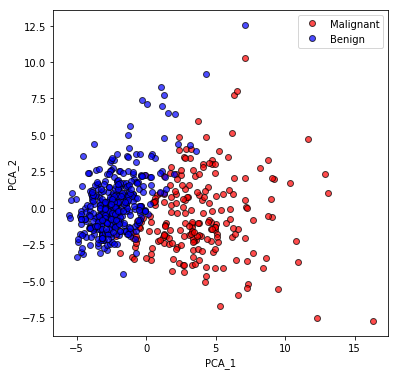

In [44]:
plt.figure(figsize=(6,6))
plt.plot(PCA_df['PCA_1'][all_df['diagnosis'] == 'M'],PCA_df['PCA_2'][all_df['diagnosis'] == 'M'],'ro', alpha = 0.7, markeredgecolor = 'k')
plt.plot(PCA_df['PCA_1'][all_df['diagnosis'] == 'B'],PCA_df['PCA_2'][all_df['diagnosis'] == 'B'],'bo', alpha = 0.7, markeredgecolor = 'k')

plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.legend(['Malignant','Benign']);

In [46]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
Xs_tsne = tsne.fit_transform(Xs)

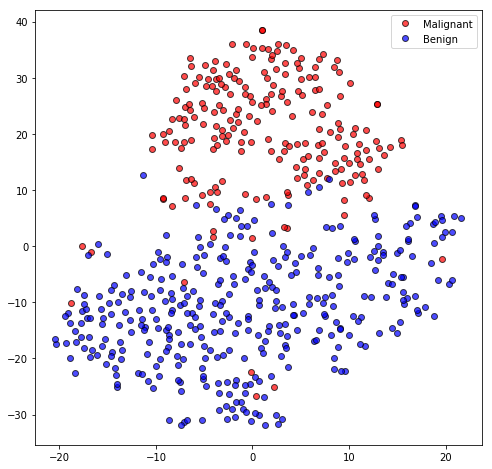

In [48]:
plt.figure(figsize=(8,8))
plt.plot(Xs_tsne[y == 'M'][:, 0], Xs_tsne[y == 'M'][:, 1], 'ro', alpha = 0.7, markeredgecolor='k')
plt.plot(Xs_tsne[y == 'B'][:, 0], Xs_tsne[y == 'B'][:, 1], 'bo', alpha = 0.7, markeredgecolor='k')
plt.legend(['Malignant','Benign']);

## Predictive model using Support Vector Machine (SVM)

Support vector machines (SVMs) learning algorithm will be used to build the predictive model.  SVMs are one of the most popular classification algorithms, and have an elegant way of transforming nonlinear data so that one can use a linear algorithm to fit a linear model to the data (Cortes and Vapnik 1995)

#### Important Parameters
The important parameters in kernel SVMs are the
* Regularization parameter C; 
* The choice of the kernel - (linear, radial basis function(RBF) or polynomial);
* Kernel-specific parameters. 

gamma and C both control the complexity of the model, with large values in either resulting in a more complex model. Therefore, good settings for the two parameters are usually strongly correlated, and C and gamma should be adjusted together.

### 划分数据集

In [49]:
from sklearn.preprocessing import LabelEncoder

# transform the class labels from their original string representation (M and B) into integers
le = LabelEncoder()
all_df['diagnosis'] = le.fit_transform(all_df['diagnosis'])

In [50]:
X = all_df.drop('diagnosis', axis=1) # drop labels for training set
y = all_df['diagnosis']

In [52]:
# # stratified sampling. Divide records in training and testing sets.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state, stratify=y)

In [53]:
# Normalize the  data (center around 0 and scale to remove the variance).
scaler = StandardScaler()
Xs_train = scaler.fit_transform(X_train)

In [54]:
# Create an SVM classifier and train it on 70% of the data set.
from sklearn.svm import SVC

clf = SVC(C=1.0, kernel='rbf', degree=3, gamma='auto', probability=True)
clf.fit(Xs_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [55]:
Xs_test = scaler.transform(X_test)

In [56]:
classifier_score = clf.score(Xs_test, y_test)

#### 在测试集上的准确度

In [58]:
print('The classifier accuracy score is {:03.2f}'.format(classifier_score))

The classifier accuracy score is 0.95


### 交叉验证

In [61]:
# Get average of 3-fold cross-validation score using an SVC estimator.
from sklearn.model_selection import cross_val_score
n_folds = 10
clf_cv = SVC(C=1.0, kernel='rbf', degree=3, gamma='auto')
cv_error = np.average(cross_val_score(clf_cv, Xs_train, y_train, cv=n_folds))

In [62]:
print('The {}-fold cross-validation accuracy score for this classifier is {:.2f}'.format(n_folds, cv_error))

The 10-fold cross-validation accuracy score for this classifier is 0.97


### Classification with Feature Selection & cross-validation

使用相关性分析挑选3个特征，再做分类

In [65]:
from IPython.display import IFrame

In [70]:
IFrame('https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html',width=900,height=400)

In [71]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline

# model with just 3 features selected
clf_fs_cv = Pipeline([
    ('feature_selector', SelectKBest(f_classif, k=3)),
    ('svc', SVC(C=1.0, kernel='rbf', degree=3, gamma='auto', probability=True))
])

scores = cross_val_score(clf_fs_cv, Xs_train, y_train, cv=3)

In [72]:
print(scores)
avg = (100 * np.mean(scores), 100 * np.std(scores)/np.sqrt(scores.shape[0]))
print("Average score and uncertainty: (%.2f +- %.3f)%%"  %avg)

[0.96268657 0.91666667 0.97727273]
Average score and uncertainty: (95.22 +- 1.491)%


看起来，只需要三个特征就已经足够取得很好的结果了

### ROC and metrics


In [74]:
# The confusion matrix helps visualize the performance of the algorithm.
from sklearn.metrics import confusion_matrix, classification_report

y_pred = clf.fit(Xs_train, y_train).predict(Xs_test)
cm = confusion_matrix(y_test, y_pred)

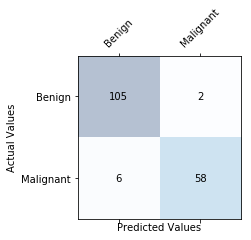

In [75]:
# lengthy way to plot confusion matrix, a shorter way using seaborn is also shown somewhere downa
fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
     for j in range(cm.shape[1]):
         ax.text(x=j, y=i,
                s=cm[i, j], 
                va='center', ha='center')
classes=["Benign","Malignant"]
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Values', )
plt.ylabel('Actual Values');

In [76]:
print(classification_report(y_test, y_pred ))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       107
           1       0.97      0.91      0.94        64

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171



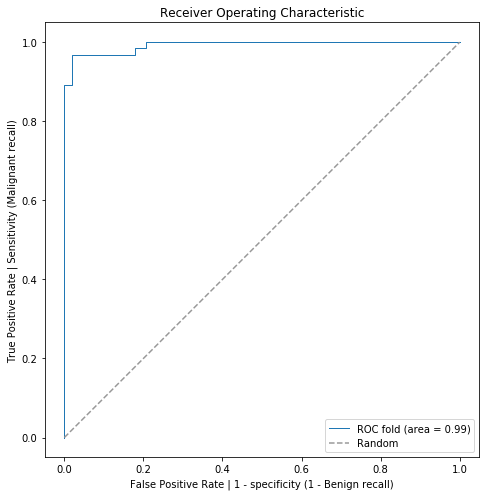

In [77]:
from sklearn.metrics import roc_curve, auc
# Plot the receiver operating characteristic curve (ROC).
plt.figure(figsize=(10,8))
probas_ = clf.predict_proba(Xs_test)
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='ROC fold (area = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Random')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate | 1 - specificity (1 - Benign recall)')
plt.ylabel('True Positive Rate | Sensitivity (Malignant recall)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.axes().set_aspect(1);

## Optimizing the SVM Classifier

### 5.1 Importance of optimizing a classifier

可以调整其中的两个超参数
* the value of C (how much to relax the margin) 
* and the type of kernel. 

The default for SVM (the SVC class) is to use the Radial Basis Function (RBF) kernel with a C value set to 1.0. We will perform a grid search using 5-fold cross validation with a standardized copy of the training dataset. We will try a number of simpler kernel types and C values with less bias and more bias (less than and more than 1.0 respectively).

Python scikit-learn provides two simple methods for algorithm parameter tuning:
* Grid Search Parameter Tuning. 
* Random Search Parameter Tuning.

In [78]:
from sklearn.model_selection import GridSearchCV

# Train classifiers.
kernel_values = [ 'linear', 'poly', 'rbf', 'sigmoid' ]
param_grid = {'C': np.logspace(-3, 2, 6), 'gamma': np.logspace(-3, 2, 6), 'kernel': kernel_values}

grid = GridSearchCV(SVC(), param_grid=param_grid, cv=5)
grid.fit(Xs_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'gamma': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [79]:
print("The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))

The best parameters are {'C': 10.0, 'gamma': 0.001, 'kernel': 'rbf'} with a score of 0.98


In [80]:
best_clf = grid.best_estimator_
best_clf.probability = True

In [81]:
y_pred = best_clf.fit(Xs_train, y_train).predict(Xs_test)
cm = confusion_matrix(y_test, y_pred)

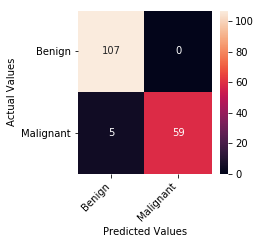

In [82]:
# using seaborn to plot confusion matrix
classes=["Benign","Malignant"]
df_cm = pd.DataFrame(cm, index=classes, columns=classes)
fig = plt.figure(figsize=(3,3))
ax = sns.heatmap(df_cm, annot=True, fmt="d")
ax.yaxis.set_ticklabels(ax.yaxis.get_ticklabels(), rotation=0, ha='right')
ax.xaxis.set_ticklabels(ax.xaxis.get_ticklabels(), rotation=45, ha='right')
plt.xlabel('Predicted Values', )
plt.ylabel('Actual Values');

In [83]:
print(classification_report(y_test, y_pred ))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       107
           1       1.00      0.92      0.96        64

    accuracy                           0.97       171
   macro avg       0.98      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



### 5.2 Visualizing the SVM Boundary

Based on the best classifier that we got from our optimization process we would now try to visualize the decision boundary of the SVM. In order to visualize the SVM decision boundary we need to reduce the multi-dimensional data to two dimension. We will resort to applying the linear PCA transformation that will transofrm our data to a lower dimensional subspace (from 30D to 2D in this case).

In [84]:
# Apply PCA by fitting the scaled data with only two dimensions
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

# Transform the original data using the PCA fit above
Xs_train_pca = pca.fit_transform(Xs_train)

In [85]:
# Take the first two PCA features. We could avoid this by using a two-dim dataset
X = Xs_train_pca
y = y_train

In [86]:
# http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

In [87]:
# http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html
def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

In [88]:
# create a mesh of values from the 1st two PCA components
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

In [89]:
clf = SVC(C=10.0, kernel='rbf', gamma=0.001)
clf.fit(X, y)

SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

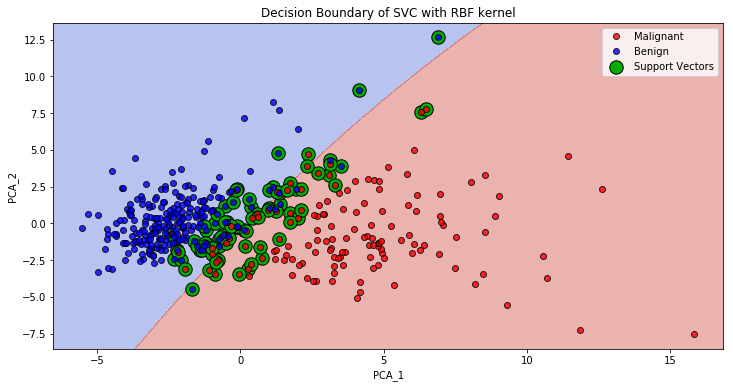

In [90]:
fig, ax = plt.subplots(figsize=(12,6))
plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.4)
plt.plot(Xs_train_pca[y_train == 1][:, 0],Xs_train_pca[y_train == 1][:, 1], 'ro', alpha=0.8, markeredgecolor='k', label='Malignant')
plt.plot(Xs_train_pca[y_train == 0][:, 0],Xs_train_pca[y_train == 0][:, 1], 'bo', alpha=0.8, markeredgecolor='k', label='Benign')

svs = clf.support_vectors_
plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#00AD00', edgecolors='k', label='Support Vectors')
    
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.title('Decision Boundary of SVC with RBF kernel')
plt.legend();

## 6. 自动化整个流程
### 6.1 数据准备和建模流程

####  Evaluate Some Algorithms
Now it is time to create some models of the data and estimate their accuracy on unseen data. Here is what we are going to cover in this step:
1. Separate out a validation dataset.
2. Setup the test harness to use 10-fold cross validation.
3. Build 5 different models  
4. Select the best model

#### Validation Dataset

In [91]:
# read the data
all_df = pd.read_csv('data/data.csv', index_col=False)
all_df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

In [92]:
all_df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [93]:
# Id column is redundant and not useful, we want to drop it
all_df.drop('id', axis =1, inplace=True)

In [94]:
from sklearn.preprocessing import LabelEncoder

# transform the class labels from their original string representation (M and B) into integers
le = LabelEncoder()
all_df['diagnosis'] = le.fit_transform(all_df['diagnosis'])

In [95]:
X = all_df.drop('diagnosis', axis=1) # drop labels for training set
y = all_df['diagnosis']

In [96]:
# Divide records in training and testing sets: stratified sampling
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7, stratify=y)

In [97]:
# Normalize the  data (center around 0 and scale to remove the variance).
scaler = StandardScaler()
Xs_train = scaler.fit_transform(X_train)

### 6.2 Evaluate Algorithms: Baseline

In [103]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Test options and evaluation metric
num_folds = 10
num_instances = len(X_train)
scoring = 'accuracy'
results = []
names = []
for name, model in tqdm(models):
    kf = KFold(n_splits=num_folds, random_state=random_state)
    cv_results = cross_val_score(model, X_train, y_train, cv=kf, scoring=scoring, n_jobs=-1)
    results.append(cv_results)
    names.append(name)

In [104]:
print('10-Fold cross-validation accuracy score for the training data for all the classifiers') 
for name, cv_results in zip(names, results):
    print("%-10s: %.6f (%.6f)" % (name, cv_results.mean(), cv_results.std()))

10-Fold cross-validation accuracy score for the training data for all the classifiers
LR        : 0.952372 (0.041013)
LDA       : 0.967308 (0.035678)
KNN       : 0.932179 (0.037324)
CART      : 0.942244 (0.025183)
NB        : 0.937308 (0.042266)
SVM       : 0.627885 (0.070174)


**Observation**

选择尽量简洁同时准确率高的模型是最好的，同时我们可以看一下模型在十折上的平均表现

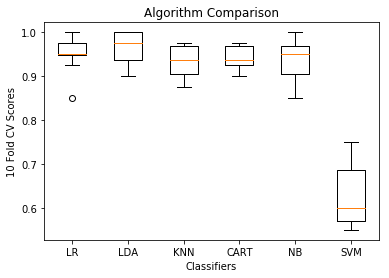

In [105]:
# Compare Algorithms
plt.title( 'Algorithm Comparison' )
plt.boxplot(results)
plt.xlabel('Classifiers')
plt.ylabel('10 Fold CV Scores')
plt.xticks(np.arange(len(names)) + 1, names);

**Observation**

为什么SVM的结果会这么差？因为SVM的数据的分布很敏感，需要将特征做标准化。

### 6.3 Evaluate Algorithms: Standardize Data

In [107]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))

results = []
names = []
for name, model in pipelines:
    kf = KFold(n_splits=num_folds, random_state=random_state)
    cv_results = cross_val_score(model, X_train, y_train, cv=kf, scoring=scoring, n_jobs=-1)
    results.append(cv_results)
    names.append(name)

In [108]:
print('10-Fold cross-validation accuracy score for the training data for all the classifiers') 
for name, cv_results in zip(names, results):
    print("%-10s: %.6f (%.6f)" % (name, cv_results.mean(), cv_results.std()))

10-Fold cross-validation accuracy score for the training data for all the classifiers
ScaledLR  : 0.984936 (0.022942)
ScaledLDA : 0.967308 (0.035678)
ScaledKNN : 0.952179 (0.038156)
ScaledCART: 0.957372 (0.027419)
ScaledNB  : 0.937244 (0.043887)
ScaledSVM : 0.969936 (0.038398)


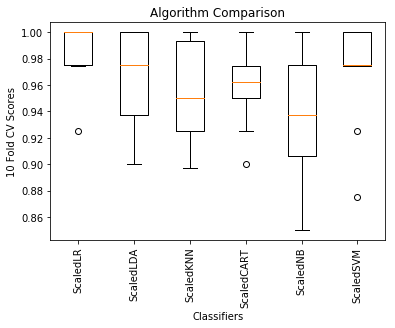

In [109]:
# Compare Algorithms
plt.title( 'Algorithm Comparison' )
plt.boxplot(results)
plt.xlabel('Classifiers')
plt.ylabel('10 Fold CV Scores')
plt.xticks(np.arange(len(names)) + 1, names, rotation="90");

**Observations**

SVM的结果现在非常好了，同时，深入挖掘几个表现较好的模型，调整其参数，我们也许可以将结果优化的更好

### 6.4 Algorithm Tuning
In this section we investigate tuning the parameters for three algorithms that show promise from the spot-checking in the previous section: LR, LDA and SVM.

#### Tuning hyper-parameters - SVC estimator

In [110]:
# Make Support Vector Classifier Pipeline
pipe_svc = Pipeline([('scl', StandardScaler()),
                     ('pca', PCA(n_components=2)),
                     ('clf', SVC(probability=True, verbose=False))])

In [111]:
# Fit Pipeline to training data and score
scores = cross_val_score(estimator=pipe_svc, X=X_train, y=y_train, cv=10, n_jobs=-1, verbose=0)
print('SVC Model Training Accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

SVC Model Training Accuracy: 0.942 +/- 0.034


In [112]:
from sklearn.model_selection import GridSearchCV

# Tune Hyperparameters
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid = [{'clf__C': param_range,'clf__kernel': ['linear']},
              {'clf__C': param_range,'clf__gamma': param_range, 'clf__kernel': ['rbf']}]

gs_svc = GridSearchCV(estimator=pipe_svc,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=10,
                  n_jobs=-1)

gs_svc = gs_svc.fit(X_train, y_train)

In [113]:
gs_svc.best_estimator_.named_steps

{'scl': StandardScaler(copy=True, with_mean=True, with_std=True),
 'pca': PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
     svd_solver='auto', tol=0.0, whiten=False),
 'clf': SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
     kernel='linear', max_iter=-1, probability=True, random_state=None,
     shrinking=True, tol=0.001, verbose=False)}

```
gs_svc.best_estimator_.named_steps['clf'].coef_
gs_svc.best_estimator_.named_steps['clf'].support_vectors_
```

In [116]:
print('SVC Model Tuned Parameters Best Score: ', gs_svc.best_score_)
print('SVC Model Best Parameters: ', gs_svc.best_params_)

SVC Model Tuned Parameters Best Score:  0.957286432160804
SVC Model Best Parameters:  {'clf__C': 1.0, 'clf__kernel': 'linear'}


#### Tuning the hyper-parameters - k-NN hyperparameters
 For our standard k-NN implementation, there are two primary hyperparameters that we’ll want to tune:

* The number of neighbors k.
* The distance metric/similarity function.

Both of these values can dramatically affect the accuracy of our k-NN classifier. Grid object is ready to do 10-fold cross validation on a KNN model using classification accuracy as the evaluation metric. In addition, there is a parameter grid to repeat the 10-fold cross validation process 30 times. Each time, the n_neighbors parameter should be given a different value from the list.

We can't give `GridSearchCV` just a list  
We've to specify `n_neighbors` should take on 1 through 30  
We can set `n_jobs` = -1 to run computations in parallel (if supported by your computer and OS) 

In [117]:
from sklearn.neighbors import KNeighborsClassifier as KNN

pipe_knn = Pipeline([('scl', StandardScaler()),
                     ('pca', PCA(n_components=2)),
                     ('clf', KNeighborsClassifier())])

In [118]:
#Fit Pipeline to training data and score
scores = cross_val_score(estimator=pipe_knn, 
                         X=X_train, 
                         y=y_train, 
                         cv=10,
                         n_jobs=-1)
print('Knn Model Training Accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

Knn Model Training Accuracy: 0.945 +/- 0.027


In [119]:
# Tune Hyperparameters
param_range = range(1, 31)
param_grid = [{'clf__n_neighbors': param_range}]
# instantiate the grid
grid = GridSearchCV(estimator=pipe_knn, 
                    param_grid=param_grid, 
                    cv=10, 
                    scoring='accuracy',
                    n_jobs=-1)
gs_knn = grid.fit(X_train, y_train)

In [120]:
print('Knn Model Tuned Parameters Best Score: ', gs_knn.best_score_)
print('Knn Model Best Parameters: ', gs_knn.best_params_)

Knn Model Tuned Parameters Best Score:  0.9472361809045227
Knn Model Best Parameters:  {'clf__n_neighbors': 6}


### 6.5 SVC最终模型

In [121]:
# Use best parameters
final_clf_svc = gs_svc.best_estimator_

# Get Final Scores
scores = cross_val_score(estimator=final_clf_svc,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=-1)

In [122]:
print('Final Model Training Accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))
print('Final Accuracy on Test set: %.5f' % final_clf_svc.score(X_test, y_test))

Final Model Training Accuracy: 0.957 +/- 0.027
Final Accuracy on Test set: 0.95322


In [123]:
#clf_svc.fit(X_train, y_train)
y_pred = final_clf_svc.predict(X_test)

In [124]:
print(accuracy_score(y_test, y_pred))

0.9532163742690059


In [125]:
print(confusion_matrix(y_test, y_pred))

[[105   2]
 [  6  58]]


In [126]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       107
           1       0.97      0.91      0.94        64

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171



# references
- https://mp.weixin.qq.com/s/o3Gkey3SnYBcZGdOWojDXQ
- https://github.com/rasbt/python-machine-learning-book
- https://github.com/susanli2016/Machine-Learning-with-Python/
- https://github.com/apachecn/AiLearning